## Poets, meet Natural Language Processing

### Extract the data

In [1]:
# Dependencies to read the SQLite database
import pandas as pd
import sqlite3
from pprint import pprint
import numpy as np
import math
import os
import re
from time import time
from IPython.core.display import clear_output

In [2]:
def create_dataframe(poet):
    """ Load the data from database into a dataframe """
    df = pd.read_sql_query(f"SELECT * FROM {poet};", conn)
    return df

In [3]:
# Create a list of unique poets
all_files = os.listdir()
prefix = "Webscraping_"
suffix = ".ipynb"

poet_list = []
for file in all_files:
    if prefix in file: 
        x = file.replace(prefix, "")
        x = x.replace(suffix, "")
        poet_list.append(x)

poet_list        

['Frost', 'Yeats', 'Kipling']

In [4]:
# Connect to the poetry database
conn = sqlite3.connect("db/Poetry.db")

In [5]:
# Iterate through the list to create a list of dataframes
poems_df = [create_dataframe(poet) for poet in poet_list]

In [6]:
# Disconnect from the poetry database
conn.close()

In [7]:
# Just in case there are nulls in the dataframe, convert these to NaN
for x in range(len(poems_df)):
    poems_df[x].replace("None", np.nan, inplace = True)

### Feature extraction

#### Year of publication

In [8]:
# Get information about publication year (various sources)
pubyear_Frost = [1913, 1916, 1928, 1914, 1916, 1916, 1923, 1923, 1928, 1923,
           1923, 1923, 1920, 1914, 1923, 1913, 1914, 1913, 1917, 1923,
           1916, 1913, 1923, 1923, 1923, 1914, 1942, 1923, 1916, 1914,
           1916, 1918, 1916, 1923, 1913, 1914, 1920]

pubyear_Yeats = [1938, 1914, 1933, 1916, 1921, 1919, 1904, 1913, 1919, 1933,
                 1932, 1889, 1916, 1898, 1927, 1938, 1904, 1916, 1921, 1915,
                 1938, 1909, 1928, 1916, 1916, 1899, 1939, 1916, 1899, 1916,
                 1899, 1917, 1892, 1914, 1917, 1889, 1921, 1889, 1899, 1892,
                 1928, 1917, 1914, 1889, 1892, 1892, 1892, 1933, 1914, 1933,
                 1917, 1914, 1933, 1912, 1919, 1935, 1917, 1914, 1934, 1934,
                 1934, 1916, 1916, 1935, 1916, 1919, 1912, 1919, 1914, 1916,
                 1916, 1912, 1919, 1916, 1916, 1914, 1912, 1934, 1914, 1912,
                 1914, 1916]

pubyear_Kipling = [1922] * 416 + [1919, 1922, 1920, 1902, 1904, 1895, 1904, 1917, 1895, 1916, 
                                  1920, 1919, 1922, 1921, 1922, 1919, 1902, 1922, 1904, 1895,
                                  1917, 1920, 1895, 1922, 1896, 1895, 1922, 1895, 1917, 1917,
                                  1920, 1915, 1922, 1922]

pubyears_list = [pubyear_Frost, pubyear_Yeats, pubyear_Kipling] 

In [9]:
for x in range(len(poems_df)):
    poems_df[x]["pub_year"] = pubyears_list[x]

In [10]:
# Preview the dataframes
poems_df[2].head()

index                                 title  \
0      0                               Prelude   
1      1                     A General Summary   
2      2                     Army Headquarters   
3      3  Study of an Elevation, in Indian Ink   
4      4                               Delilah   

                                  link  \
0  https://www.bartleby.com/364/1.html   
1  https://www.bartleby.com/364/2.html   
2  https://www.bartleby.com/364/3.html   
3  https://www.bartleby.com/364/4.html   
4  https://www.bartleby.com/364/5.html   

                                               lines             poet  \
0  (To Departmental Ditties)I HAVE eaten your bre...  Rudyard Kipling   
1  WE are very slightly changed\nFrom the semi-ap...  Rudyard Kipling   
2  Old is the song that I sing\nOld as my unpaid ...  Rudyard Kipling   
3  This ditty is a string of lies.\nButhow the de...  Rudyard Kipling   
4  We have another Viceroy now, those days are de...  Rudyard Kipling   

   pub_year  
0      1922  
1      1922  
2      1922  
3      1922  
4      1922

In [11]:
poems_df[1].head()

index                        title  \
0      0             Under Ben Bulben   
1      1                       A Coat   
2      2  A Dialogue of Self and Soul   
3      3              A Drinking Song   
4      4  A Meditation in Time of War   

                                                link  \
0  https://www.poetryfoundation.org/poems/43298/u...   
1  https://www.poetryfoundation.org/poetrymagazin...   
2  https://www.poetryfoundation.org/poems/43294/a...   
3  https://www.poetryfoundation.org/poems/50337/a...   
4  https://www.poetryfoundation.org/poems/57318/a...   

                                               lines                  poet  \
0  I\n Swear by what the Sages spoke,\n Round the...  William Butler Yeats   
1  I made my song a coat,Covered with embroiderie...  William Butler Yeats   
2  IMy Soul. I summon to the winding ancient stai...  William Butler Yeats   
3  Wine comes in at the mouth,\n And love comes i...  William Butler Yeats   
4  For one throb of the artery, ,While on that ol...  William Butler Yeats   

   pub_year  
0      1938  
1      1914  
2      1933  
3      1916  
4      1921

In [12]:
poems_df[0].head()

index                      title  \
0      0                    October   
1      1                ‘Out, Out—’   
2      2  Acquainted with the Night   
3      3        After Apple-Picking   
4      4                    Birches   

                                                link  \
0  https://www.poetryfoundation.org/poems/53084/o...   
1  https://www.poetryfoundation.org/poems/53087/o...   
2  https://www.poetryfoundation.org/poems/47548/a...   
3  https://www.poetryfoundation.org/poems/44259/a...   
4  https://www.poetryfoundation.org/poems/44260/b...   

                                               lines          poet  pub_year  
0  O hushed October morning mild,\nThy leaves hav...  Robert Frost      1913  
1  The buzz saw snarled and rattled in the yard\n...  Robert Frost      1916  
2  I have been one acquainted with the night.\nI ...  Robert Frost      1928  
3  My long two-pointed ladder's sticking through ...  Robert Frost      1914  
4  When I see birches bend to left and right\nAcr...  Robert Frost      1916

In [13]:
# Concatenate the dataframes
poems_df1 = pd.concat(poems_df).reset_index(drop = True)
poems_df1 = poems_df1[["title", "lines", "poet", "pub_year"]]
poems_df1.shape

(569, 4)

In [14]:
# Preview the concatenated dataframe
poems_df1.tail()

title  \
564                 The Rabbi’s Song   
565                       The Return   
566               The Sons of Martha   
567        The Way through the Woods   
568  There was a small boy of Quebec   

                                                 lines             poet  \
564  IF thought ever reach to Heaven,\nOn Heaven le...  Rudyard Kipling   
565                    PEACE is declared, and I return  Rudyard Kipling   
566                                               None  Rudyard Kipling   
567  THEY shut the road through the woods\nSeventy ...  Rudyard Kipling   
568  THERE was a small boy of Quebec,\nWho was buri...  Rudyard Kipling   

     pub_year  
564      1917  
565      1920  
566      1915  
567      1922  
568      1922

In [15]:
# Drop rows with null values
poems_df2 = poems_df1.dropna()

# Drop rows with duplicate titles
poems_df2 = poems_df2.drop_duplicates(subset = "title", keep = "first").reset_index(drop = True)

poems_df2.shape

(544, 4)

In [16]:
# Drop rows with duplicate titles (after inspecting the dataframe)
# 149: The Betrothed
# 534: An Astrologer's Song
# 538: L' Envoi
# 539: Mary, Pity Women!
poems_df3 = poems_df2.drop(poems_df2.index[[149, 534, 538, 539]])
poems_df3.shape

(540, 4)

#### Poem length and lexical diversity

In [17]:
# Create lists of titles, lines, and poets 
titles_list = poems_df3["title"].values.tolist()
lines_list = poems_df3["lines"].values.tolist()
poets_list = poems_df3["poet"].values.tolist()
years_list = poems_df3["pub_year"].values.tolist()

In [18]:
# Get length of the entire poem for each poem in each dataframe
lengths_list = [len(lines.split()) for lines in lines_list]
len(lengths_list)

540

In [19]:
# Remove the substrings that start with "Note ." up to the end of the poem
lines_list = [re.sub(r"(Note .*)", "", poem) for poem in lines_list]

# Remove substring that has dates
lines_list = [re.sub(r"(Queen Victorias JubileeJUNE ST)", "", poem) for poem in lines_list]

# Use the lines_list in the poems_df3 as replacement for the original content
poems_df3 ["lines"] = lines_list

# Preview the dataframe
poems_df3.head()

title  \
0                    October   
1                ‘Out, Out—’   
2  Acquainted with the Night   
3        After Apple-Picking   
4                    Birches   

                                               lines          poet  pub_year  
0  O hushed October morning mild,\nThy leaves hav...  Robert Frost      1913  
1  The buzz saw snarled and rattled in the yard\n...  Robert Frost      1916  
2  I have been one acquainted with the night.\nI ...  Robert Frost      1928  
3  My long two-pointed ladder's sticking through ...  Robert Frost      1914  
4  When I see birches bend to left and right\nAcr...  Robert Frost      1916

#### Transform the data

In [20]:
# Dependencies
import re, string

import nltk
# nltk.download("punkt")
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#### Tokenise, Remove Stop Words, Lemmatise
Reference for lemmatisation: https://marcobonzanini.com/2015/01/26/stemming-lemmatisation-and-pos-tagging-with-python-and-nltk/

In [21]:
# Remove stop words from the list
stops = stopwords.words("english")
exclude = list(set(string.punctuation)) + ['’', '‘']

# Extend stop words to include pronouns
stops.extend(["shall", "isnt", "youve", "youll", "youre", "dont", "cant", "hath", "shouldnt", "theres", "didnt",
              "thee", "thou", "weve", "wouldnt", "theyre", "couldnt", "shes", "hes", "shalt", "thats", "thy", 
              "heh", "isna", "aint", "also", "whos", "theyll", "whose", "would", "youd", "theyd"])

# Extend stop words to include proper nouns of people
people_names = ["huree", "chunder", "mookerjee", "yar", "mahommed", "chimbu", "singh", "bikaneer", 
                "tantia", "bhil", "killar", "khan", "marri", "jowar", "nubbee", "baksh", "punjabi", "jat", 
                "abdul", "huq", "rafiq", "wahabi", "boh", "hla-oo", "pubbi", "boanerges", "blitzen", "jenny", 
                "julian", "vouse", "binks", "hezabad", "dykes", "cheops", "agrippina", "ahasuerus", "cornelia", 
                "jenkins", "gubbins", "mehitabel", "potiphar", "aberys", "delilah", "ulysses", "rustum", "lal",
                "barrett", "jack", "boffkin", "minnie", "sleary", "carrie", "jones", "cupid", "apollo", 
                "lothario", "exeter", "battleby", "tring", "pagett", "subadar", "prag", "tewarri", "jemadar", 
                "hira", "eshmitt", "sahib", "jane", "austen", "beecher", "stowe", "rouse", "bellal", "fultah",
                "machiavelli", "lilly", "praxeds", "babu", "bandar", "rankens", "anne", "salem", "hardiekers",
                "ultrudas", "euclid", "afridis", "dufferins", "wagner", "kitty", "smith", "diana", "hecate", 
                "victorias", "mogul", "mahratta", "mlech", "mary", "harrigans"
               ]

stops.extend(people_names)

# Extend stop words to remove common words among topics (after calculating LDA)
stops.extend(["man"])

# Lemmatise the words in each list to retain their roots
lemmatiser = WordNetLemmatizer()

In [22]:
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'youll',
 'youre',
 'youve',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 

In [23]:
def translator(text, conversion_dict, before = None):
    if not text:
        return text
    else:
        before = before or str.lower
        t = before(text)
        for key, value in conversion_dict.items():
            t = t.replace(key, value)
    return t

In [24]:
def tokeniser(poem):
    """ Processes the poem into tokens and removes stop words, numbers, and punctuations """
    
    word_dict = {"mistresssilver": "mistress silver", "winesit": "wine sit", "belike": "be like", 
                 "madeexcept": "made except", "ironcold": "iron cold", "ironcan": "iron can", "ironto": "ironto", 
                 "sayeth": "say", "dovethe": "dove the", "knoweth": "know", "fully": "full", "whats": "what",
                 "lassshe": "lass she", "guisebut": "guise but", "indias": "india", "viceroys": "viceroy",
                 "governshall": "govern shall", "hadfollowed": "had followed", "rejoiceif": "rejoice if", 
                 "valiantsceptres": "valiant sceptres", "ironis": "iron is", "theethee": "thee thee", 
                 "ironmust": "iron must", "treasoni": "treason i", "drowsin": "drows in", "knowest": "know", 
                 "hatchsicksick": "hatch sick sick", "shiftin": "shift in", "sailthree": "sail three", 
                 "sphinxs": "sphinx", "slearys": "sleary", "boffkinimpulse": "boffkin impulse", 
                 "roomno morebright": "room no more bright", "againthe": "again the", "walkin": "walk", 
                 "ironshall": "iron shall", "umballagoods": "umballa goods", "wifes": "wife", 
                 "boffkins": "boffkin", "fopperiesunnecessary": "fopperies unnecessary", "bangsa": "bangs a",
                 "ironwas": "iron was", "tumbleth": "tumble", "followeth": "follow", "queensa": "queens a",
                 "brisbanethe": "brisbane the", "gentlemen": "gentleman", "asiapower": "asia power", 
                 "otherwisehillmen": "otherwise hillmen", "otherwiseso": "otherwise so", "juneno": "june no", 
                 "villagers": "villager", "niggers": "nigger", "sendeth": "send", "halberds": "halberd",
                 "tamarisksthe": "tamarisks the", "emblematical": "emblem", "samehis": "same his",
                 "rogues": "rogue", "englands": "england", "dovedoveoh": "dove dove oh", "speakin":"speak in", 
                 "verandahs": "verandah", "lillythirteen": "lilly thirteen", "filld": "fill", "lovers": "love", 
                 "affectionwhat": "affection what", "shadewhether": "shade whether", "idance": "i dance", 
                 "whatevers": "whatever", "friendsuffer": "friend suffer", "sufferedbe": "suffered be", 
                 "chinaor": "china or", "barethe": "bare the", "manso": "man so", "mildfor": "mild for", 
                 "rimmons": "rimmon", "lieth": "lie", "groundin": "ground in", "lateyet": "late yet", 
                 "charmbut": "charm but", "placebabbling": "place babbling", "faceand": "face and", 
                 "struckand": "struck and", "airbeggar": "air beggar", "septemberat": "september at", 
                 "cheapwherefore": "cheap wherefore", "goodwe": "good we", "youbut": "you but",
                 "thatarrangements": "that arrangements", "caricaturedecrepit": "caricature decrepit", 
                 "germanys": "germany", "trailthe": "trail the", "woodbecause": "wood because",  
                 "irelands": "ireland", "watchers": "watch", "acttoo": "act too", "xvimy": "xvi\nmy",
                 "helmets": "helmet", "embroideries": "embroidery", "itwore": "it wore", "muscleat": "muscle at",
                 "mythologies": "mythology", "rendeth": "rend", "bythey": "by they", "dreamfor": "dream for",
                 "plainone": "plain one", "englishah": "english ah", "withthe": "with the", "sawwhat": "saw what",
                 "greatbiglongblackforty": "great big long black forty", "bullocksthose": "bullocks those", 
                 "blinddumbbroad breechedbeggars": "blind dumb broad breeched beggars", "songhow": "song how",
                 "paymentshe": "payment she", "fairlocally": "fair locally", "clampherdown": "clamp her down", 
                 "foundations": "foundation", "bewarea": "beware a", "youyou": "you you", "richest": "rich",
                 "leaders": "leader", "daughters": "daughter", "doorkeepers": "doorkeeper", "clearmy": "clear my",
                 "coolnesseverywhere": "coolness everywhere", "villages": "village", "suchbeing": "such being", 
                 "overmuchconsider": "over much consider", "flandersflanders": "flanders flanders", 
                 "labourslet": "labours let", "factsbefore": "facts before", "viiif": "vii\nif",
                 "rememberest": "remember", "chargeseven": "charges even", "ripenin": "ripen in", 
                 "survivors": "survivor", "anothers": "another", "tushes": "tush", "followers": "follow", 
                 "thriftily": "thrift", "approvedprosper": "approved prosper", "shoutingwhat": "shouting what", 
                 "richand": "rich and", "viiiseek": "viii\nseek", "greya": "grey a", "traini": "train i", 
                 "melbournegreeting": "melbourne greeting", "sydneygreeting": "sydney greeting",  
                 "capetownhail": "cape town hail", "shipboard": "ship board", "daylove": "day love", 
                 "therewith": "there with", "vidoes": "vi\ndoes", "vigouralways": "vigour always", 
                 "vwho": "v\nwho", "browna": "brown a", "ivthe": "iv\nthe", "xviiif": "xvii\nif",
                 "headand": "head and", "sisters": "sister", "combatantsonly": "combatants only", 
                 "worldhere": "world here", "investigators": "investigate", "bombayroyal": "bombay royal", 
                 "rangoonhail": "rangoon hail", "singaporehail": "singapore hail", "halifaxinto": "halifax into", 
                 "bluethe": "blue the", "ixif": "ix\nif", "septembermy": "september my", "xwith": "x\nwith",
                 "floorand": "floor and", "hearts": "heart", "fighthaggle": "fight haggle", "surely": "sure", 
                 "housekin": "house kin", "butaverage": "but average", "paththeir": "path their", 
                 "mano": "man o", "xipleasant": "xi\npleasant", "agrippinas": "agrippina's", "xiias": "xii\nas",
                 "thathave": "that have", "wellingtonye": "wellington ye", "thunderclapit": "thunderclap it", 
                 "fillin": "fill", "rubbishry": "rubbish", "lastwhen": "last when", "xiiithe": "xiii\nthe", 
                 "treesinland": "trees inland", "failureis": "failure is", "congressmenonly": "congressmen only", 
                 "xivin": "xiv\in", "bakshquestion": "baksh question", "xvif": "xv\nif", "frailgot": "frail got", 
                 "betrayedat": "betrayed at", "stretchthree": "stretch three", "knowabout": "know about", 
                 "sunderlandmet": "sunderland met", "seasround": "seas round", "artistthen": "artist then", 
                 "departmental": "department", "thoughtsweeter": "thought sweeter", "comelylet": "comely let", 
                 "alonelike": "alone like", "coursesthe": "courses the", "enragedthe": "enraged the", 
                 "hospitalnearly": "hospital nearly", "xviiiby": "xviii\nby", "gaolstopped": "gaol stopped",
                 "cleaveyellow": "cleave yellow", "passbeggar": "pass beggar", "youngand": "young and", 
                 "knownhad": "known had", "placeand": "place and", "diedand": "died and", "buthow": "but how", 
                 "garbsqueezed": "garb squeezed", "xixmy": "xix\nmy", "detailblind": "detail blind",
                 "aberyswith": "aberys with", "coastwisecross": "coastwise cross", "failedthen": "failed then", 
                 "returnreturn": "return return", "afterfollow": "after follow", "earthgifts": "earth gifts", 
                 "alsobut" : "also but", "brightdelilahs": "bright delilahs", "putneys": "putney",
                 "housefriend": "house friend", "patteran": "patter an", "whatisname": "what is name", 
                 "frommagdalene": "from magdalene", "english": "england", "daythe": "day the", 
                 "passwe": "pass we", "delilahs": "delilah", ",As": ",\nAs", ",Song": "\nSong", ",For": "\nFor", 
                 "politicsyet": "politics yet", "aboutand": "about and", "struckbut": "struck but", 
                 "ladynot": "lady not", "iiiblister": "iii\nblister", "seniorsincluding": "seniors including",
                 "itlie": "it lie", "compeller": "compel", "leaveth": "leave", "easeand": "ease and", 
                 "sweepersunity": "sweepers unity", "comesand": "comes and", "huntergo": "hunter go", 
                 "dk-bungalowsold": "dak-bungalows old", "pharaohs": "pharaoh", "iiyea": "ii\nyea",
                 "forelandthe": "foreland the", "kingthe": "king the", "peopleabsolute": "people absolute", 
                 "dykesat": "dykes at", "thoughtand": "thought and", "alarmsbut": "alarms but", "saith": "say",
                 "theremy": "there my", "fleshalso": "flesh also", "kolazaislightly": "kolazai slightly", 
                 ",Covered": ",\nCovered", ",Out": ",\nOut", ",From": ",\nFrom", ",But": "\nBut", "iif": "i\nif",
                 ",In": ",\nIn", "Ditties)I": "Ditties)\nI", "artistthen": "artist then", "itwore": "it\nwore",
                 "cattegatwhats therearenolightstoguide": "cattegat whats there are no lights to guide", 
                 "workmenthat": "workmen that", "minutesmoke": "minute smoke", "citycharnock": "city charnock",
                 "fanteejoined": "fantee joined", "gauriwhich": "gauri which", "soexceptin": "so exceptin",
                 "sameenorrmous": "same enorrmous", "flamemy": "flame my", "herealone": "here alone", 
                 "muchthey": "much they", "weethe": "wee the","darka": "dark a", "earlsthe": "earls the",
                 "seventyonetwothree": "seventy one two three", "pollokshawsfra": "pollokshaws fra",
                 "whelpwhen": "whelp when", "theneh": "then eh", "thenyea": "then yea", "thenye": "then ye", 
                 "runnew": "run new", "tellblind": "tell blind", "sunthe": "sun the", "gongsagain": "gongs again",
                 "thereyeve": "there ye ve", "shaftay": "shaft ay", "wrathto": "wrath to", "justthe": "just the",
                 "apollyonnah": "apollyon nah", "whaurtouplifted": "whaurto uplifted", "donejudge": "done judge",
                 "lessontheirs": "lesson theirs", "grandtheyre": "grand theyre", 
                }
    
    pattern = "|".join(sorted(re.escape(k) for k in word_dict))
     
#     words = poem[0: poem.find("note .")] # remove all substrings that start with "note ."
#     words1 = words.replace("[back]", "") # remove all "[back]" substrings
    words2 = poem.replace("—", " ") # remove all "—" substrings
    words3 = translator(words2, word_dict) # to correct words based on word_dict
    words4 = re.sub("[^a-zA-Z0-9 ]"," ", words3) # Replace punctuations with white space
#     words5 = re.sub(" +", " ", words4).strip() # Remove extra white spaces
    
    words6 = word_tokenize(words4) # Create a list of words
    words7 = [word for word in words6 if word not in stops] # Filter the keywords
    words8 = [word for word in words7 if word not in exclude] # Filter the keywords
    words9 = [lemmatiser.lemmatize(word, pos = "v") for word in words8] # Lemmatise each word
    words10 = [wd for wd in words9 if len(wd) > 2]
    words11 = [lemmatiser.lemmatize(word, pos = "v") for word in words10] # Lemmatise each word (again)
    words12 = [lemmatiser.lemmatize(word, pos = "n") for word in words11] # Lemmatise each word (again)
    words13 = [lemmatiser.lemmatize(word, pos = "r") for word in words12] # Lemmatise each word (again)
    words14 = [lemmatiser.lemmatize(word, pos = "a") for word in words13] # Lemmatise each word (again)
    words_list = [wd for wd in words14 if len(wd) > 2]
    
    preprocessed_text = " ".join(words_list) # Convert the list of strings back to one string

    
    return words_list, preprocessed_text # Returns a tuple

In [25]:
# Tokenise each poem in each dataframe and create a processed text
start_time = ()
tokenised_poems = []   
for x in range(len(lines_list)):
    print(f"Now calculating for {x}th poem.")
    %time y = tokeniser(lines_list[x]) 
    tokenised_poems.append(y)
    clear_output(wait = True)
print(f"End of {len(lines_list)} calculations.")    

# Unpack the tuples into lists of tokens and of filtered poems
df_tokens, df_filtered = map(list, zip(*tokenised_poems))

# Determine the length of each filtered poem
df_filtered_length = [len(df) for df in df_tokens]

End of 540 calculations.


In [26]:
# Add three new columns to each dataframe for tokens and filtered text
poems_df3["tokens"] = df_tokens
poems_df3["filteredPoem"] = df_filtered
poems_df3["filteredLength"] = df_filtered_length

In [27]:
# Preview the dataframe
poems_df3 = poems_df3.reset_index(drop = True)
poems_df3.head()

title  \
0                    October   
1                ‘Out, Out—’   
2  Acquainted with the Night   
3        After Apple-Picking   
4                    Birches   

                                               lines          poet  pub_year  \
0  O hushed October morning mild,\nThy leaves hav...  Robert Frost      1913   
1  The buzz saw snarled and rattled in the yard\n...  Robert Frost      1916   
2  I have been one acquainted with the night.\nI ...  Robert Frost      1928   
3  My long two-pointed ladder's sticking through ...  Robert Frost      1914   
4  When I see birches bend to left and right\nAcr...  Robert Frost      1916   

                                              tokens  \
0  [hush, october, morning, mild, leave, ripen, f...   
1  [buzz, saw, snarl, rattle, yard, make, dust, d...   
2  [one, acquaint, night, walk, rain, back, rain,...   
3  [long, two, point, ladder, stick, tree, toward...   
4  [see, birch, bend, leave, right, across, line,...   

                                        filteredPoem  filteredLength  
0  hush october morning mild leave ripen fall tom...              73  
1  buzz saw snarl rattle yard make dust drop stav...             146  
2  one acquaint night walk rain back rain outwalk...              55  
3  long two point ladder stick tree toward heaven...             140  
4  see birch bend leave right across line straigh...             237

In [28]:
# Number of poems
poets = list(set(poets_list))

for x in range(len(poets)):
    print (f"There are {poems_df3.loc[poems_df3['poet'] == poets[x]].shape[0]} poems written by {poets[x]}.")

There are 421 poems written by Rudyard Kipling.
There are 82 poems written by William Butler Yeats.
There are 37 poems written by Robert Frost.


In [29]:
# Longest and shorted poems and their lengths
for x in range(len(poets)):

    df = poems_df3[poems_df3["poet"] == poets[x]]
    longest_length = df["filteredLength"].max()
    shortest_length = df["filteredLength"].min()
    mean_length = round(df["filteredLength"].mean(),0)
    
    longest_title = df[df["filteredLength"] == longest_length]["title"].item().encode("ascii", "ignore")\
    .decode("utf-8")
    shortest_title = df[df["filteredLength"] == shortest_length]["title"].item().encode("ascii", "ignore")\
    .decode("utf-8")
        # .encode("ascii", "ignore").decode("utf-8") removes the ascii and the unicode characters
        # .item() extracts the value of each element in a pandas series
    
    print(f"Author: {poets[x]}\n")
    print(f"Longest Poem: Title = {longest_title}, Length = {longest_length}")
    print(f"Shortest Poem: Title = {shortest_title}, Length = {shortest_length}")
    print(f"Average Poem Length = {mean_length}")
    print("=====\n")

Author: Rudyard Kipling

Longest Poem: Title = MAndrews Hymn, Length = 1166
Shortest Poem: Title = There was a small boy of Quebec, Length = 13
Average Poem Length = 182.0
=====

Author: William Butler Yeats

Longest Poem: Title = The Two Kings, Length = 1000
Shortest Poem: Title = A Needle's Eye, Length = 12
Average Poem Length = 108.0
=====

Author: Robert Frost

Longest Poem: Title = The Death of the Hired Man, Length = 612
Shortest Poem: Title = Dust of Snow, Length = 15
Average Poem Length = 117.0
=====



In [30]:
# List of unique words; how many unique words per poem?
unique_words = [list(set(x)) for x in df_tokens]
length_unique_words = [len(x) for x in unique_words]

In [31]:
# Lexical diversity: proportion of unique words among all the words in the poem
# I used the filtered words
lex_div = [round(length_unique_words[i] / df_filtered_length[i],3) for i in range(len(length_unique_words))]
lex_div[500]

0.635

### Word importance
Source: https://stevenloria.com/tf-idf/

In [32]:
# Dependencies
import math
from textblob import TextBlob as tb

In [33]:
# Create a function that calculates term frequency
def tf(word, poem):
    return poem.words.count(word) / len(poem.words)

# Create a function that determines the number of documents that contain a certain word
def n_docs(word, poemlist):
    return sum(1 for poem in poemlist if word in poem.words)

# Create a function that determines the inverse document frequency (IDF)
# IDF = how common a word is among all the documents in poemlist
def idf(word, poemlist):
    return math.log(len(poemlist) / (1 + n_docs(word, poemlist)))

def tdidf(word, poem, poemlist):
    return tf(word, poem) * idf(word, poemlist)

In [34]:
# Create the poemlist from df["lines"]
%time poemlist = [tb(poem) for poem in poems_df3["filteredPoem"]]
poemlist

CPU times: user 8.76 ms, sys: 413 µs, total: 9.17 ms
Wall time: 9.11 ms


[TextBlob("hush october morning mild leave ripen fall tomorrow wind wild waste crow forest call tomorrow may form hush october morning mild begin hour day slow make day seem brief heart averse beguile beguile way know release one leaf break day noon release another leaf one tree one far away retard sun gentle mist enchant land amethyst slow slow grape sake leave already burn frost cluster fruit must else lose grape sake along wall"),
 TextBlob("buzz saw snarl rattle yard make dust drop stave length stick wood sweet scent stuff breeze draw across lift eye could count five mountain range one behind sunset far vermont saw snarl rattle snarl rattle run light bear load nothing happen day call day wish might say please boy give half hour boy count much save work sister stand beside apron tell supper word saw prove saw know supper mean leap boy hand seem leap must give hand however neither refuse meet hand boy first outcry rueful laugh swing toward hold hand half appeal half keep life spill b

In [35]:
# Create an empty list to be filled with text blobs from cleaning poemlist
poemlist2 = []

# Loop through the poemlist
for i in range(0, len(poemlist)):
    
    # Remove words that are shorter than 3 characters
    new_string = ' '.join([w for w in str(poemlist[i]).split() if len(w) > 3])
    
    # Replace emm dash with space
    new_string2 = new_string.replace("—", " ")
    
    # Convert string to text blob
    new_string2 = tb(new_string2)
    
    # Append the text blob to the list of text blobs
    poemlist2.append(new_string2)
    
poemlist2

[TextBlob("hush october morning mild leave ripen fall tomorrow wind wild waste crow forest call tomorrow form hush october morning mild begin hour slow make seem brief heart averse beguile beguile know release leaf break noon release another leaf tree away retard gentle mist enchant land amethyst slow slow grape sake leave already burn frost cluster fruit must else lose grape sake along wall"),
 TextBlob("buzz snarl rattle yard make dust drop stave length stick wood sweet scent stuff breeze draw across lift could count five mountain range behind sunset vermont snarl rattle snarl rattle light bear load nothing happen call wish might please give half hour count much save work sister stand beside apron tell supper word prove know supper mean leap hand seem leap must give hand however neither refuse meet hand first outcry rueful laugh swing toward hold hand half appeal half keep life spill since enough know work though child heart spoil hand doctor come sister hand already doctor dark ethe

In [36]:
# Calculate the most important words
start_time = time()
impt_words = []
for i, poem in enumerate(poemlist2):
    print(f"Now processing {i}th poem.")
    scores = {word: tdidf(word, poem, poemlist2) for word in poem.words}
    sorted_words = sorted(scores.items(), key = lambda x: x[1], reverse = True)
    clear_output(wait = True)
    
    for word, score in sorted_words[:5]:
        impt_words.append((i, word, round(score, 5)))
        
elapsed_time = time() - start_time
print(f"End of {len(poemlist2)} calculations. Elapsed time: {round(elapsed_time/60, 3)} min.")        

End of 540 calculations. Elapsed time: 2.378 min.


In [37]:
impt_words

[(0, 'tomorrow', 0.15572),
 (0, 'beguile', 0.15572),
 (0, 'mild', 0.14285),
 (0, 'grape', 0.14285),
 (0, 'october', 0.13796),
 (1, 'snarl', 0.12686),
 (1, 'rattle', 0.1007),
 (1, 'supper', 0.08457),
 (1, 'doctor', 0.08073),
 (1, 'hand', 0.0639),
 (2, 'acquaint', 0.23604),
 (2, 'outwalked', 0.12724),
 (2, 'unearthly', 0.12724),
 (2, 'luminary', 0.12724),
 (2, 'furthest', 0.11802),
 (3, 'apple', 0.23113),
 (3, 'ladder', 0.10887),
 (3, 'sleep', 0.10026),
 (3, 'pick', 0.07743),
 (3, 'bough', 0.0628),
 (4, 'birch', 0.09),
 (4, 'swinger', 0.05598),
 (4, 'tree', 0.05037),
 (4, 'climb', 0.04801),
 (4, 'bend', 0.04494),
 (5, 'christmas', 0.09874),
 (5, 'tree', 0.0798),
 (5, 'dollar', 0.06683),
 (5, 'cent', 0.06256),
 (5, 'pasture', 0.05783),
 (6, 'hemlock', 0.43275),
 (6, 'crow', 0.32447),
 (6, 'mood', 0.31055),
 (6, 'part', 0.25279),
 (6, 'shake', 0.23292),
 (7, 'favor', 0.3499),
 (7, 'destruction', 0.28124),
 (7, 'suffice', 0.2716),
 (7, 'taste', 0.2559),
 (7, 'perish', 0.23792),
 (8, 'star',

In [38]:
# Create a dictionary of indices (article numbers) and poets
poet_dict = dict(zip(poems_df3.index, poems_df3.poet.tolist()))
title_dict = dict(zip(poems_df3.index, poems_df3.title.tolist()))

In [39]:
# Create a dataframe of important words per poem
poems_df4 = pd.DataFrame(impt_words, columns = ["PoemNo", "Word", "TF-IDF"])

# Map the poets and the titles to the important words based on the dictionary
poems_df4["Poet"] = poems_df4["PoemNo"].map(poet_dict)
poems_df4["Title"] = poems_df4["PoemNo"].map(title_dict)
poems_df4.head()

PoemNo      Word   TF-IDF          Poet    Title
0       0  tomorrow  0.15572  Robert Frost  October
1       0   beguile  0.15572  Robert Frost  October
2       0      mild  0.14285  Robert Frost  October
3       0     grape  0.14285  Robert Frost  October
4       0   october  0.13796  Robert Frost  October

In [40]:
# Save tf-idf as a sqlite database table (for Javascript use later)
conn = sqlite3.connect("db/Poetry.db")

# Create a database table from the dataframe
poems_df4.to_sql("tfidf", conn, if_exists = "replace", index = False)

# Preview the database table
pd.read_sql_query("select * from tfidf;", conn).head()

PoemNo      Word   TF-IDF          Poet    Title
0       0  tomorrow  0.15572  Robert Frost  October
1       0   beguile  0.15572  Robert Frost  October
2       0      mild  0.14285  Robert Frost  October
3       0     grape  0.14285  Robert Frost  October
4       0   october  0.13796  Robert Frost  October

In [41]:
conn.close()

In [42]:
# Group the important words by poem title
poems_df5 = pd.DataFrame(poems_df4.groupby(["Title", "Word"])["TF-IDF"].mean())
poems_df5

TF-IDF
Title                     Word                
A Ballad of Burial        contentedly  0.04443
                          sake         0.28115
                          solemnly     0.04443
                          tonga        0.07786
                          yore         0.04443
A Ballade of Jakko Hill   fate         0.05908
                          hill         0.09085
                          jakko        0.20982
                          mist         0.10143
                          wait         0.07107
A Boy Scouts Patrol Song chorus       0.17539
                          look         0.24508
                          patrol       0.21091
                          scout        0.07830
                          tight        0.07187
A BritishRoman Song      arduous      0.09997
                          hardihood    0.09997
                          rome         0.12147
                          strongly     0.08759
                          unshakeable  0.09997
A Carol                   good         0.06994
                          judge        0.14273
                          lord         0.10858
                          ripen        0.10400
                          spring       0.12731
A Charm                   clutch       0.05598
                          facd         0.05598
                          fester       0.05598
                          flower       0.05991
                          restore      0.07978
...                                        ...
White Horses              herd         0.05726
                          horse        0.06366
                          rider        0.05598
                          trust        0.05667
                          white        0.05753
Wilful-Missing            might        0.05944
                          miss         0.06735
                          share        0.06430
                          testify      0.16629
                          wilful       0.11086
With Drake in the Tropics admiral      0.13883
                          bell         0.05798
                          shine        0.06127
                          south        0.09377
                          unsheltered  0.05282
With Scindia to Delhi     delhi        0.05698
                          league       0.04152
                          mare         0.04564
                          populzai     0.04542
                          scindia      0.07949
Zion                      baal         0.46717
                          doorkeeper   0.08886
                          halberd      0.08886
                          present      0.10979
                          zion         0.90671
‘Out, Out—’               doctor       0.08073
                          hand         0.06390
                          rattle       0.10070
                          snarl        0.12686
                          supper       0.08457

[2700 rows x 1 columns]

### Visualise the important words

In [43]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
import numpy as np

from ipywidgets import widgets, interactive

In [44]:
# Create a widget containing poem titles (sorted alphabetically)
titles = titles_list
titles.sort()

poem_title = widgets.Dropdown(options = ["Choose a poem..."] + titles, value = "Choose a poem...", 
                              description = "Title:", disabled = False)

In [45]:
# Create a filter based on title
def plot_it(poem_title):
    if poem_title != "Choose a poem...":
        poems_df6 = poems_df4[poems_df4["Title"] == poem_title]
        
        plt.figure(figsize = (10, 6))
        sns.set(font_scale = 1.5)
        graph = sns.barplot(y = "Word", x = "TF-IDF", data = poems_df6, palette = "Blues_d")

In [46]:
# Plot the data by poem title
interactive(plot_it, poem_title = poem_title)

interactive(children=(Dropdown(description='Title:', options=('Choose a poem...', 'A Ballad of Burial', 'A Bal…

### Sentiment Analysis - Metadata

In [47]:
# Predict sentiments based on textblobs
sentiment_polarity = [round(poem.sentiment.polarity, 3) \
                      for poem in poemlist2]
sentiment_cat = ["positive" if sp > 0
                 else "negative" if sp < 0
                 else "neutral"
                 for sp in sentiment_polarity]

In [48]:
metadata = pd.DataFrame({"PoemNo": list(poet_dict.keys()),
                         "Poet": list(poet_dict.values()),
                         "Title": list(title_dict.values()),
                         "Content": poems_df3["lines"].tolist(),
                         "Length": df_filtered_length,
                         "Sentiment": sentiment_cat,
                         "Pubn_Year": poems_df3["pub_year"].tolist(),
                         "Lexical_Diversity": lex_div}, 
                        columns = ["PoemNo", "Poet", "Title", "Length", 
                                   "Content", "Sentiment", "Pubn_Year", "Lexical_Diversity"])
metadata.head()

PoemNo          Poet                      Title  Length  \
0       0  Robert Frost                    October      73   
1       1  Robert Frost                ‘Out, Out—’     146   
2       2  Robert Frost  Acquainted with the Night      55   
3       3  Robert Frost        After Apple-Picking     140   
4       4  Robert Frost                    Birches     237   

                                             Content Sentiment  Pubn_Year  \
0  O hushed October morning mild,\nThy leaves hav...  negative       1913   
1  The buzz saw snarled and rattled in the yard\n...  negative       1916   
2  I have been one acquainted with the night.\nI ...  positive       1928   
3  My long two-pointed ladder's sticking through ...  positive       1914   
4  When I see birches bend to left and right\nAcr...  positive       1916   

   Lexical_Diversity  
0              0.767  
1              0.753  
2              0.855  
3              0.800  
4              0.726

In [49]:
# Replace \n with <br>
content2 = [x.replace("\n", "<br>") for x in metadata["Content"]]
content2

['O hushed October morning mild,<br>Thy leaves have ripened to the fall;<br>Tomorrow’s wind, if it be wild,<br>Should waste them all.<br>The crows above the forest call;<br>Tomorrow they may form and go.<br>O hushed October morning mild,<br>Begin the hours of this day slow.<br>Make the day seem to us less brief.<br>Hearts not averse to being beguiled,<br>Beguile us in the way you know.<br>Release one leaf at break of day;<br>At noon release another leaf;<br>One from our trees, one far away.<br>Retard the sun with gentle mist;<br>Enchant the land with amethyst.<br>Slow, slow!<br>For the grapes’ sake, if they were all,<br>Whose leaves already are burnt with frost,<br>Whose clustered fruit must else be lost—<br>For the grapes’ sake along the wall.',
 'The buzz saw snarled and rattled in the yard<br>And made dust and dropped stove-length sticks of wood,<br>Sweet-scented stuff when the breeze drew across it.<br>And from there those that lifted eyes could count<br>Five mountain ranges one be

In [50]:
metadata["Content"] = content2
metadata.head()

PoemNo          Poet                      Title  Length  \
0       0  Robert Frost                    October      73   
1       1  Robert Frost                ‘Out, Out—’     146   
2       2  Robert Frost  Acquainted with the Night      55   
3       3  Robert Frost        After Apple-Picking     140   
4       4  Robert Frost                    Birches     237   

                                             Content Sentiment  Pubn_Year  \
0  O hushed October morning mild,<br>Thy leaves h...  negative       1913   
1  The buzz saw snarled and rattled in the yard<b...  negative       1916   
2  I have been one acquainted with the night.<br>...  positive       1928   
3  My long two-pointed ladder's sticking through ...  positive       1914   
4  When I see birches bend to left and right<br>A...  positive       1916   

   Lexical_Diversity  
0              0.767  
1              0.753  
2              0.855  
3              0.800  
4              0.726

In [51]:
# Save metadata as a sqlite database table (for Javascript use later)
conn = sqlite3.connect("db/Poetry.db")

# Create a database table from the dataframe
metadata.to_sql("metadata", conn, if_exists = "replace", index = False)

# Preview the database table
pd.read_sql_query("select * from metadata;", conn).head()

PoemNo          Poet                      Title  Length  \
0       0  Robert Frost                    October      73   
1       1  Robert Frost                ‘Out, Out—’     146   
2       2  Robert Frost  Acquainted with the Night      55   
3       3  Robert Frost        After Apple-Picking     140   
4       4  Robert Frost                    Birches     237   

                                             Content Sentiment  Pubn_Year  \
0  O hushed October morning mild,<br>Thy leaves h...  negative       1913   
1  The buzz saw snarled and rattled in the yard<b...  negative       1916   
2  I have been one acquainted with the night.<br>...  positive       1928   
3  My long two-pointed ladder's sticking through ...  positive       1914   
4  When I see birches bend to left and right<br>A...  positive       1916   

   Lexical_Diversity  
0              0.767  
1              0.753  
2              0.855  
3              0.800  
4              0.726

In [52]:
conn.close()

### Topic Modelling
Sources: 
1. https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
2. https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [53]:
# Gensim 
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [54]:
# Build the bigram and the trigram model
tokens = df_tokens
bigram = gensim.models.Phrases(tokens, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[tokens], threshold = 100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [55]:
def process_words(texts, stop_words = stops, allowed_postags = ["NOUN", "ADJ", "ADV"]):
    """ Remove stop words, create bigrams and trigrams, lemmatise """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]    
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []
    
    nlp = spacy.load("en", disable = ["parser", "ner"])
    
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
        # remove stop words (again)         
        texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] \
                     for doc in texts_out]
        
        # remove words shorter than three letters       
        texts_out = [[word for word in lst if len(word) > 2] for lst in texts_out]

    return texts_out

In [56]:
# Filter text (again!)
%time filtered_text = process_words(tokens)
filtered_text

CPU times: user 2min 28s, sys: 846 ms, total: 2min 29s
Wall time: 2min 30s


[['hush',
  'october',
  'morning',
  'mild',
  'ripen',
  'fall',
  'tomorrow',
  'wind',
  'wild',
  'waste',
  'crow',
  'forest',
  'call',
  'tomorrow',
  'hush',
  'october',
  'morning',
  'mild',
  'hour',
  'day',
  'slow',
  'day',
  'brief',
  'heart',
  'averse',
  'beguile',
  'beguile',
  'way',
  'release',
  'leaf',
  'break',
  'day',
  'noon',
  'leaf',
  'tree',
  'far',
  'away',
  'retard',
  'sun',
  'gentle',
  'mist',
  'enchant',
  'land',
  'amethyst',
  'slow',
  'slow',
  'grape',
  'sake',
  'already',
  'frost',
  'cluster',
  'fruit',
  'else',
  'grape',
  'sake',
  'wall'],
 ['snarl',
  'rattle',
  'yard',
  'dust',
  'stave',
  'length',
  'stick',
  'wood',
  'sweet',
  'scent',
  'stuff',
  'breeze',
  'draw',
  'lift',
  'eye',
  'mountain',
  'range',
  'sunset',
  'far',
  'vermont',
  'snarl',
  'rattle',
  'snarl',
  'rattle',
  'run',
  'light',
  'bear',
  'load',
  'nothing',
  'day',
  'call',
  'day',
  'wish',
  'half',
  'hour',
  'boy',


In [57]:
# Create dictionary
%time id2words = corpora.Dictionary(filtered_text)

# Create corpus term frequency (convert dictionary to bag-of-words)
%time corpus = [id2words.doc2bow(text) for text in filtered_text]

CPU times: user 130 ms, sys: 2.68 ms, total: 132 ms
Wall time: 133 ms
CPU times: user 73.8 ms, sys: 306 µs, total: 74.1 ms
Wall time: 77.2 ms


#### How many topics?

In [58]:
# Create a range of number of topics
num_topics = list(range(1, 21))
num_topics

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [59]:
# Define a function that calculates the coherence score 
def coherence_score(num_topics):
    """ Create a LDA model """
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2words,
                                            num_topics = num_topics,
                                            random_state = 100,
                                            update_every = 1,
                                            chunksize = 600,
                                            passes = 100,
                                            alpha = "auto",
                                            per_word_topics = True)
    
    """ Calculate the coherence score """
    coherence_model_lda = CoherenceModel(model = lda_model, 
                                         texts = filtered_text, 
                                         dictionary = id2words,
                                         coherence = 'c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    """ Perplexity """
    perplexity = lda_model.log_perplexity(corpus)
    
    return coherence_lda, lda_model, perplexity

In [60]:
# Calculate the coherence score of each number of topics
# start_time = time()

coh_score = []
for x in num_topics:
    start_time = time()
    print(f"Now processing {x} topic/s.")
    y = coherence_score(x)[0]
    elapsed_time = time() - start_time
    print(f"Elapsed time: {round(elapsed_time/60, 3)} min.")
    
    coh_score.append(y)
    
    print(f"Calculation for {x} topic completed.")  
    print("=====\n")
print(f"End of {len(num_topics)} calculations.")    

Now processing 1 topic/s.
Elapsed time: 1.267 min.
Calculation for 1 topic completed.
=====

Now processing 2 topic/s.
Elapsed time: 2.29 min.
Calculation for 2 topic completed.
=====

Now processing 3 topic/s.
Elapsed time: 2.415 min.
Calculation for 3 topic completed.
=====

Now processing 4 topic/s.
Elapsed time: 2.459 min.
Calculation for 4 topic completed.
=====

Now processing 5 topic/s.
Elapsed time: 2.434 min.
Calculation for 5 topic completed.
=====

Now processing 6 topic/s.
Elapsed time: 2.52 min.
Calculation for 6 topic completed.
=====

Now processing 7 topic/s.
Elapsed time: 2.456 min.
Calculation for 7 topic completed.
=====

Now processing 8 topic/s.
Elapsed time: 2.405 min.
Calculation for 8 topic completed.
=====

Now processing 9 topic/s.
Elapsed time: 2.56 min.
Calculation for 9 topic completed.
=====

Now processing 10 topic/s.
Elapsed time: 2.457 min.
Calculation for 10 topic completed.
=====

Now processing 11 topic/s.
Elapsed time: 2.48 min.
Calculation for 11 t

Text(0,0.5,'Coherence score')

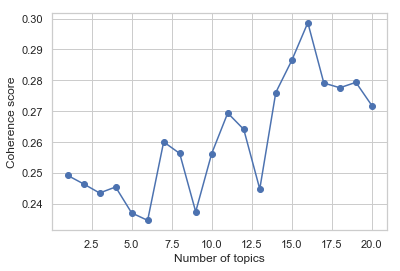

In [61]:
# Plot number of topics vs coherence score
# Find the highest coherence score before the trend flattens out
plt.plot(num_topics, coh_score, "bo-")
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")

In [62]:
# Building the LDA model using the chosen number of topics
final_number = 5
%time coh_score2 = coherence_score(final_number)

# Compute Perplexity
print(f"Perplexity: {coh_score2[2]}")
print(f"Coherence Score: {coh_score2[0]}")

CPU times: user 2min 22s, sys: 1.18 s, total: 2min 23s
Wall time: 2min 27s
Perplexity: -8.332302835348644
Coherence Score: 0.23710252429661965


In [63]:
# Keywords for the top 10 topics
%time doc_lda = coh_score2[1][corpus]
pprint(coh_score2[1].print_topics())

CPU times: user 69 µs, sys: 25 µs, total: 94 µs
Wall time: 101 µs
[(0,
  '0.010*"old" + 0.006*"day" + 0.005*"sea" + 0.004*"long" + 0.004*"woman" + '
  '0.004*"good" + 0.004*"love" + 0.004*"never" + 0.004*"little" + '
  '0.003*"heart"'),
 (1,
  '0.004*"day" + 0.004*"never" + 0.004*"captain" + 0.004*"england" + '
  '0.004*"little" + 0.003*"long" + 0.003*"sea" + 0.003*"old" + 0.003*"hill" + '
  '0.003*"gun"'),
 (2,
  '0.005*"old" + 0.005*"god" + 0.004*"day" + 0.004*"lord" + 0.004*"sea" + '
  '0.003*"away" + 0.003*"pack" + 0.003*"heart" + 0.003*"hand" + 0.003*"time"'),
 (3,
  '0.006*"good" + 0.006*"love" + 0.006*"day" + 0.005*"time" + 0.005*"thing" + '
  '0.004*"eye" + 0.004*"heart" + 0.004*"god" + 0.004*"world" + 0.004*"old"'),
 (4,
  '0.008*"king" + 0.005*"little" + 0.004*"sea" + 0.004*"hand" + 0.004*"son" + '
  '0.004*"day" + 0.004*"night" + 0.004*"god" + 0.004*"never" + 0.004*"old"')]


### Most important words per topic

In [64]:
# Dependencies
import pyLDAvis
import pyLDAvis.gensim

In [65]:
# Create graphs of most important words per topic
# Based on the LDA model

pyLDAvis.enable_notebook()
%time panel = pyLDAvis.gensim.prepare(coh_score2[1], corpus, id2words)
panel

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


CPU times: user 898 ms, sys: 161 ms, total: 1.06 s
Wall time: 5.17 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.065773 -0.028223       1        1  34.562912
4      0.026765 -0.027377       2        1  22.530582
0     -0.002554 -0.042597       3        1  19.685423
1     -0.111624 -0.002666       4        1  11.888372
2      0.021641  0.100862       5        1  11.332714, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
80    Default  353.000000          old  353.000000  30.0000  30.0000
1592  Default  232.000000         king  232.000000  29.0000  29.0000
2813  Default   43.000000      captain   43.000000  28.0000  28.0000
1234  Default   41.000000         dive   41.000000  27.0000  27.0000
2841  Default   38.000000         wolf   38.000000  26.0000  26.0000
481   Default  219.000000          god  219.000000  25.0000  25.0000
2857  Default   54.000000         pack   54.000000  24.0000  24.0000
569   Default  105.000000       mother  105.000000  23.0000  23.0000
486   Default   78.000000         hill   78.000000  22.0000  22.0000
1627  Default  117.000000          son  117.000000  21.0000  21.0000
9211  Default   16.000000  ubique_mean   16.000000  20.0000  20.0000
3741  Default   42.000000         file   42.000000  19.0000  19.0000
1303  Default  159.000000         lord  159.000000  18.0000  18.0000
999   Default  142.000000      england  142.000000  17.0000  17.0000
621   Default  134.000000        woman  134.000000  16.0000  16.0000
1650  Default   75.000000          law   75.000000  15.0000  15.0000
483   Default   90.000000          gun   90.000000  14.0000  14.0000
170   Default  198.000000         long  198.000000  13.0000  13.0000
268   Default   85.000000        right   85.000000  12.0000  12.0000
3     Default  138.000000         away  138.000000  11.0000  11.0000
4906  Default   28.000000         flag   28.000000  10.0000  10.0000
6247  Default   35.000000     sergeant   35.000000   9.0000   9.0000
1521  Default  278.000000          sea  278.000000   8.0000   8.0000
7491  Default   12.000000    cock_crew   12.000000   7.0000   7.0000
435   Default   34.000000       flower   34.000000   6.0000   6.0000
1242  Default   74.000000      soldier   74.000000   5.0000   5.0000
238   Default   45.000000         girl   45.000000   4.0000   4.0000
244   Default  169.000000         head  169.000000   3.0000   3.0000
360   Default   93.000000        round   93.000000   2.0000   2.0000
1513  Default   72.000000        queen   72.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
4776   Topic5    7.425056     northern   15.422701   1.4465  -6.9454
481    Topic5   35.395218          god  219.850616   0.3511  -5.3837
1650   Topic5   18.454052          law   75.278717   0.7716  -6.0350
80     Topic5   39.812244          old  353.960022  -0.0075  -5.2661
3      Topic5   23.851559         away  138.469284   0.4187  -5.7784
887    Topic5   17.952419      brother   82.437408   0.6532  -6.0625
238    Topic5   13.066004         girl   45.248413   0.9353  -6.3802
2374   Topic5   15.133176       praise   63.343803   0.7458  -6.2334
10     Topic5   34.067001          day  347.582092  -0.1452  -5.4219
1521   Topic5   29.242691          sea  278.623657  -0.0768  -5.5746
73     Topic5   22.544838        light  172.845154   0.1406  -5.8348
488    Topic5   18.422869          lie  115.887863   0.3384  -6.0367
516    Topic5   14.693731        blind   68.265541   0.6415  -6.2628
20     Topic5   23.610826        heart  222.815887  -0.0672  -5.7886
132    Topic5   23.035812         time  215.903519  -0.0603  -5.8132
65     Topic5   23.244289         hand  227.357391  -0.1030  -5.8042
1011   Topic5   19.302546          war  141.579773   0.1849  -5.9900
244    Topic5   20.667280         head  169.360031   0.0740  -5.9217
23     Topic5   18.696415         land  143.955978   0.1363 

In [66]:
# Save the graph as a html page
pyLDAvis.save_html(panel, "lda.html")

### Dominant Topic in each poem

In [67]:
def format_topics_sentences(doc_lda, ldamodel = coh_score2[1], texts = tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(doc_lda):
        row = row_list[0] if ldamodel.per_word_topics else row_list 
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), \
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [68]:
df_topic_sents_keywords = format_topics_sentences(doc_lda)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.9988   
1            1             3.0              0.6094   
2            2             4.0              0.9977   
3            3             0.0              0.9991   
4            4             3.0              0.6496   
5            5             2.0              0.6510   
6            6             3.0              0.9944   
7            7             3.0              0.9958   
8            8             3.0              0.7724   
9            9             4.0              0.9982   

                                            Keywords  \
0  good, love, day, time, thing, eye, heart, god,...   
1  good, love, day, time, thing, eye, heart, god,...   
2  king, little, sea, hand, son, day, night, god,...   
3  old, day, sea, long, woman, good, love, never,...   
4  good, love, day, time, thing, eye, heart, god,...   
5  old, god, day, lord, sea, away, pack, heart, h...   
6  good, love, day, time, thing, eye, heart, god,...   
7  good, love, day, time, thing, eye, heart, god,...   
8  good, love, day, time, thing, eye, heart, god,...   
9  king, little, sea, hand, son, day, night, god,...   

                                                Text  
0  [hush, october, morning, mild, leave, ripen, f...  
1  [buzz, saw, snarl, rattle, yard, make, dust, d...  
2  [one, acquaint, night, walk, rain, back, rain,...  
3  [long, two, point, ladder, stick, tree, toward...  
4  [see, birch, bend, leave, right, across, line,...  
5  [city, withdraw, leave, last, country, country...  
6  [way, crow, shake, dust, snow, hemlock, tree, ...  
7  [say, world, end, fire, say, ice, taste, desir...  
8  [come, real, star, fill, upper, sky, earth, co...  
9  [others, taunt, kneel, well, curb, always, wro...

### Data Visualisation

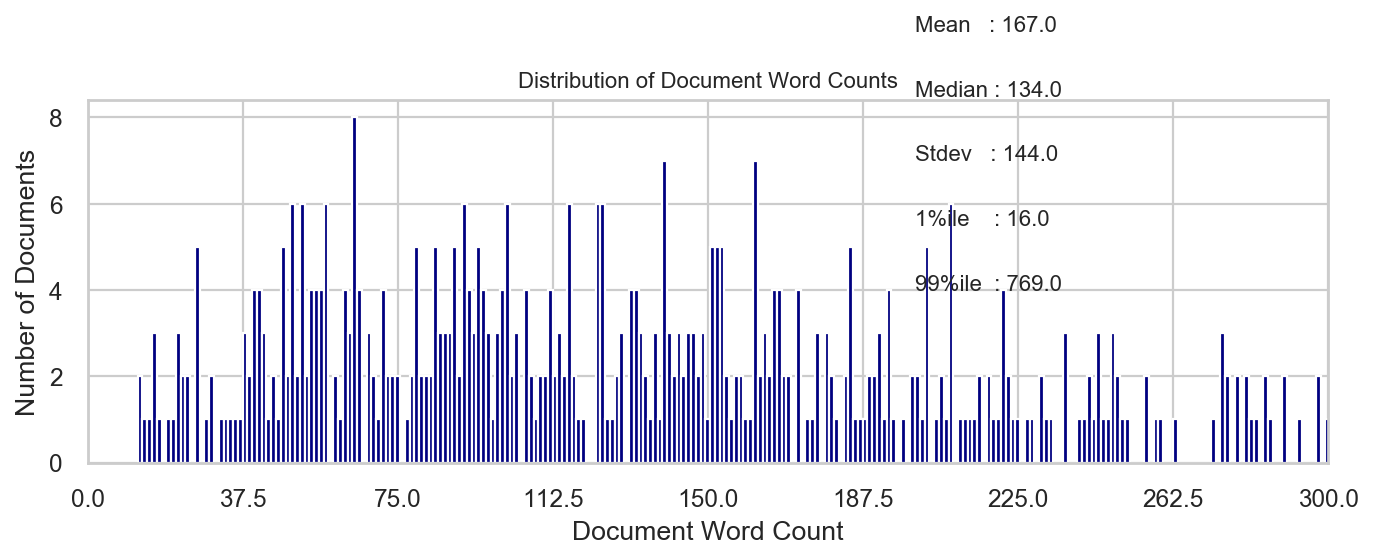

In [69]:
# Length of text per tokenised poem
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize = (10,3), dpi = 160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(200, 10, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(200, 8.5, "Median : " + str(round(np.median(doc_lens))))
plt.text(200, 7, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(200, 5.5, "1%ile    : " + str(round(np.quantile(doc_lens, q = 0.01))))
plt.text(200, 4, "99%ile  : " + str(round(np.quantile(doc_lens, q = 0.99))))

plt.gca().set(xlim = (0, 300), ylabel = 'Number of Documents', xlabel = 'Document Word Count')
plt.tick_params(size = 8)
plt.xticks(np.linspace(0, 300, 9))
plt.title('Distribution of Document Word Counts', fontdict = dict(size = 10))
plt.show()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


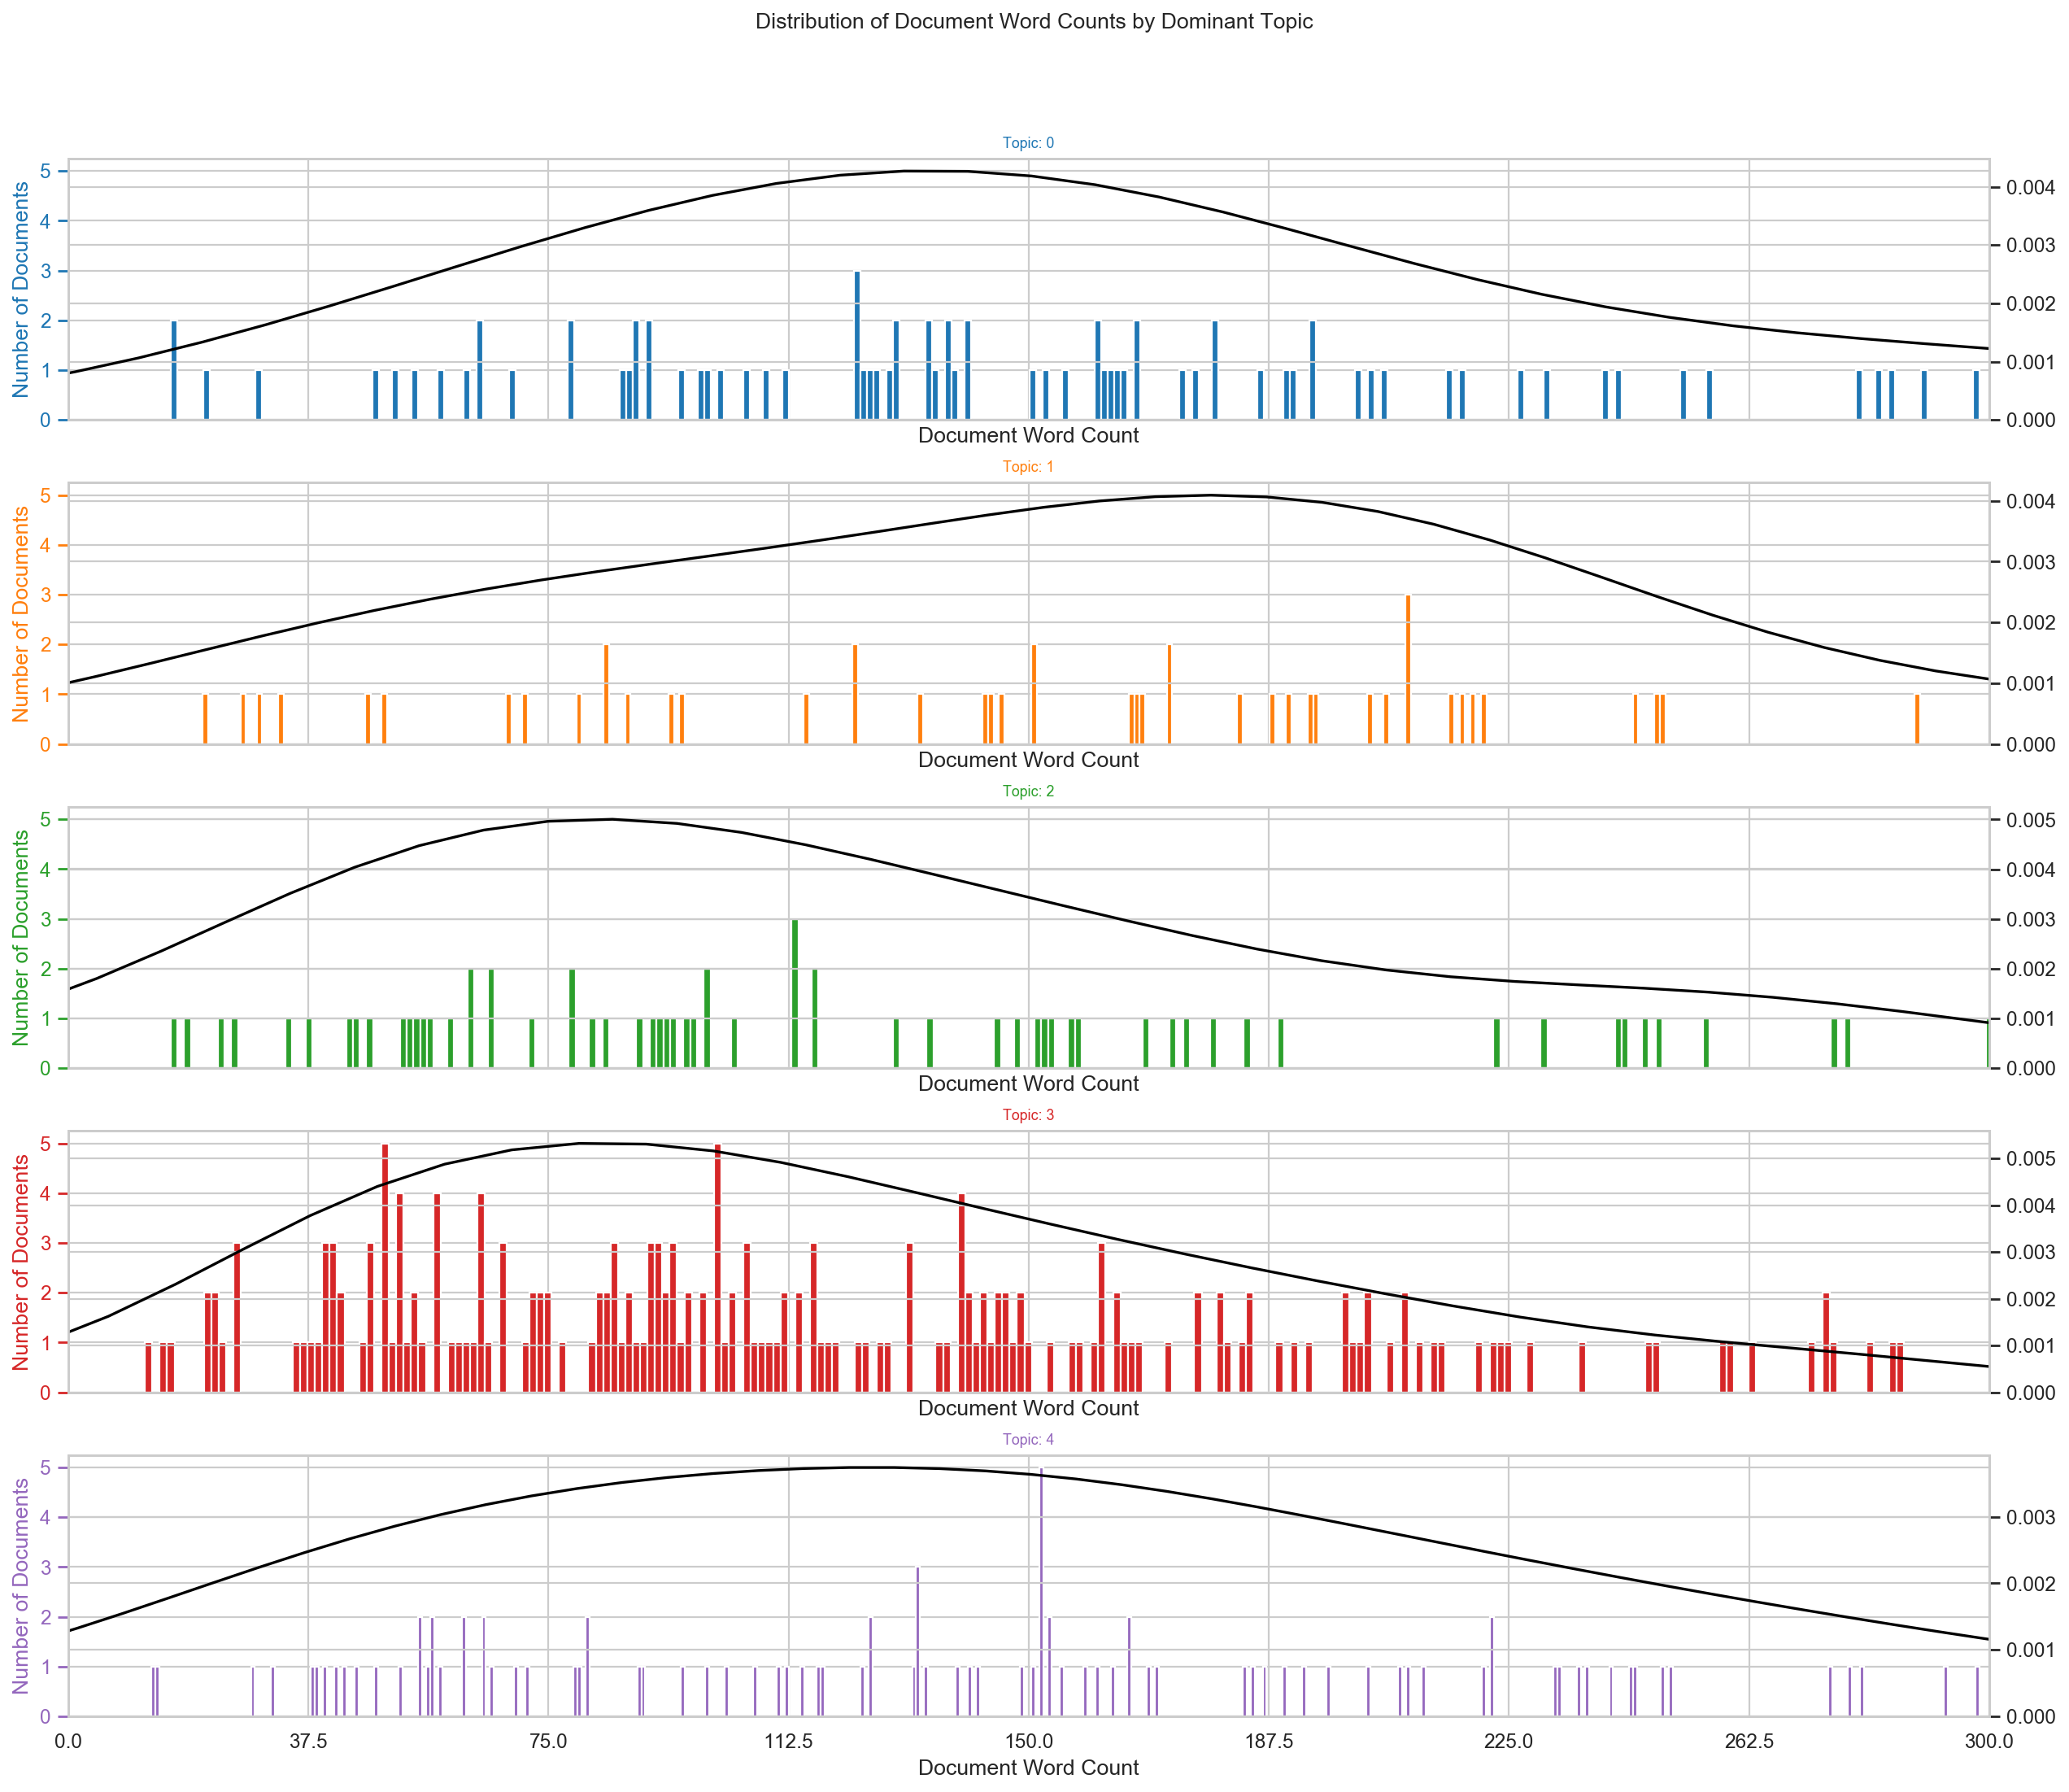

In [70]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5, figsize = (16,14), dpi = 160, sharex = True, sharey = True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color = cols[i])
    ax.tick_params(axis = 'y', labelcolor = cols[i], color = cols[i])
    sns.kdeplot(doc_lens, color = "black", shade = False, ax = ax.twinx())
    ax.set(xlim = (0, 300), xlabel = 'Document Word Count')
    ax.set_ylabel('Number of Documents', color = cols[i])
    ax.set_title('Topic: '+str(i), fontdict = dict(size = 8, color = cols[i]))

fig.tight_layout()
fig.subplots_adjust(top = 0.90)
plt.xticks(np.linspace(0, 300, 9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize = 12)
plt.show()

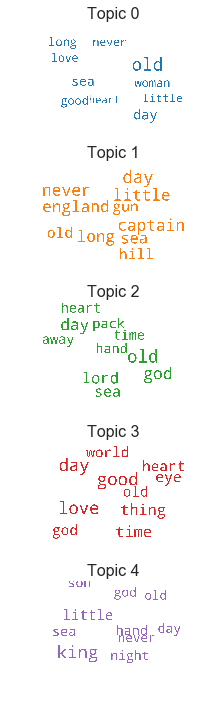

In [71]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords = stops,
                  background_color = 'white',
                  width = 2500,
                  height = 1800,
                  max_words = 10,
                  colormap = 'tab10',
                  color_func = lambda *args, **kwargs: cols[i],
                  prefer_horizontal = 1.0)

topics = coh_score2[1].show_topics(formatted=False)

fig, axes = plt.subplots(5, figsize = (10,10), sharex = True, sharey = True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size = 300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size = 16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace = 0, hspace = 0)
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.tight_layout()
plt.show()

In [72]:
from collections import Counter
topics = coh_score2[1].show_topics(formatted = False)
data_flat = [w for w_list in filtered_text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df2 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])   
df2.head()

word  topic_id  importance  word_count
0    old         0    0.010248         409
1    day         0    0.005654         398
2    sea         0    0.005384         321
3   long         0    0.004445         228
4  woman         0    0.004384         152

In [73]:
df2.shape

(50, 4)

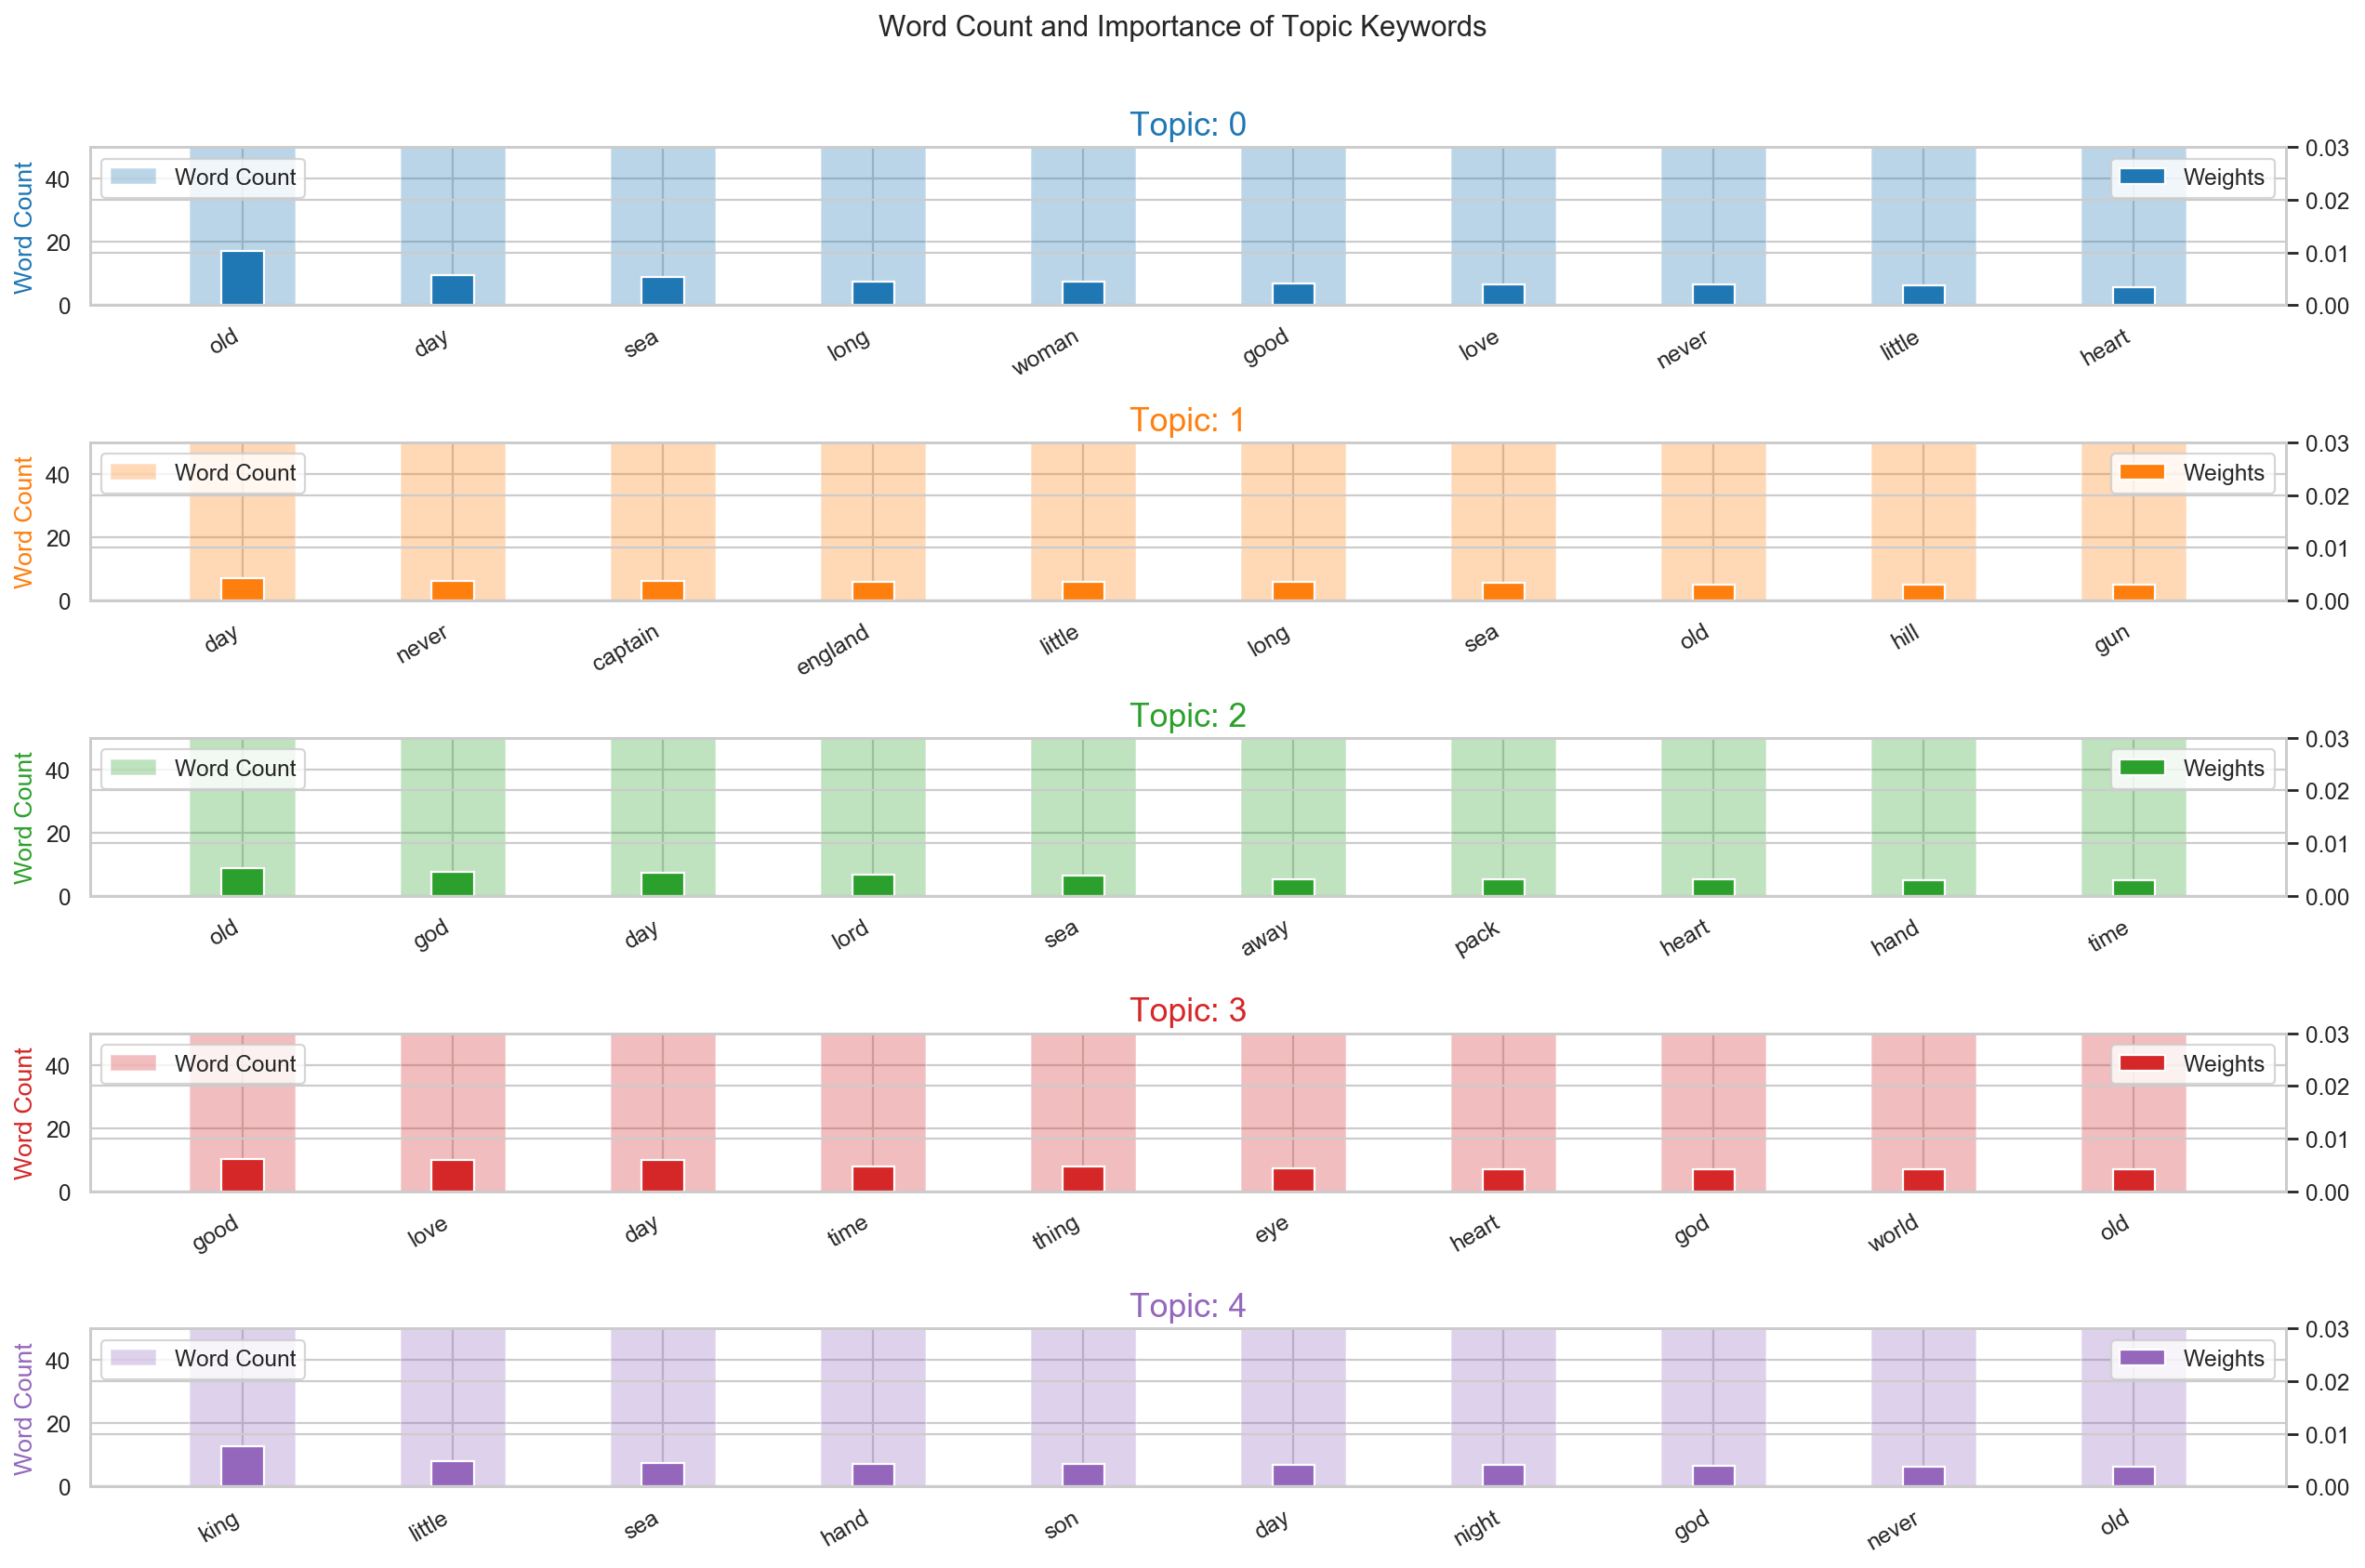

In [74]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, figsize = (16,10), sharey = True, dpi = 160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x = 'word', 
           height = "word_count", 
           data = df2.loc[df2.topic_id == i, :], 
           color = cols[i], 
           width = 0.5, 
           alpha = 0.3, 
           label = 'Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x = 'word', 
                height = "importance", 
                data = df2.loc[df2.topic_id == i, :], 
                color = cols[i], width = 0.2,
                label ='Weights')
    ax.set_ylabel('Word Count', color = cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), color = cols[i], fontsize = 16)
    ax.tick_params(axis = 'y', left = False)
    ax.set_xticklabels(df2.loc[df2.topic_id == i, 'word'], 
                       rotation = 30, 
                       horizontalalignment = 'right')
    ax.legend(loc ='upper left')
    ax_twin.legend(loc = 'upper right')

fig.tight_layout(w_pad = 2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize = 14, y = 1.05)    
plt.show()

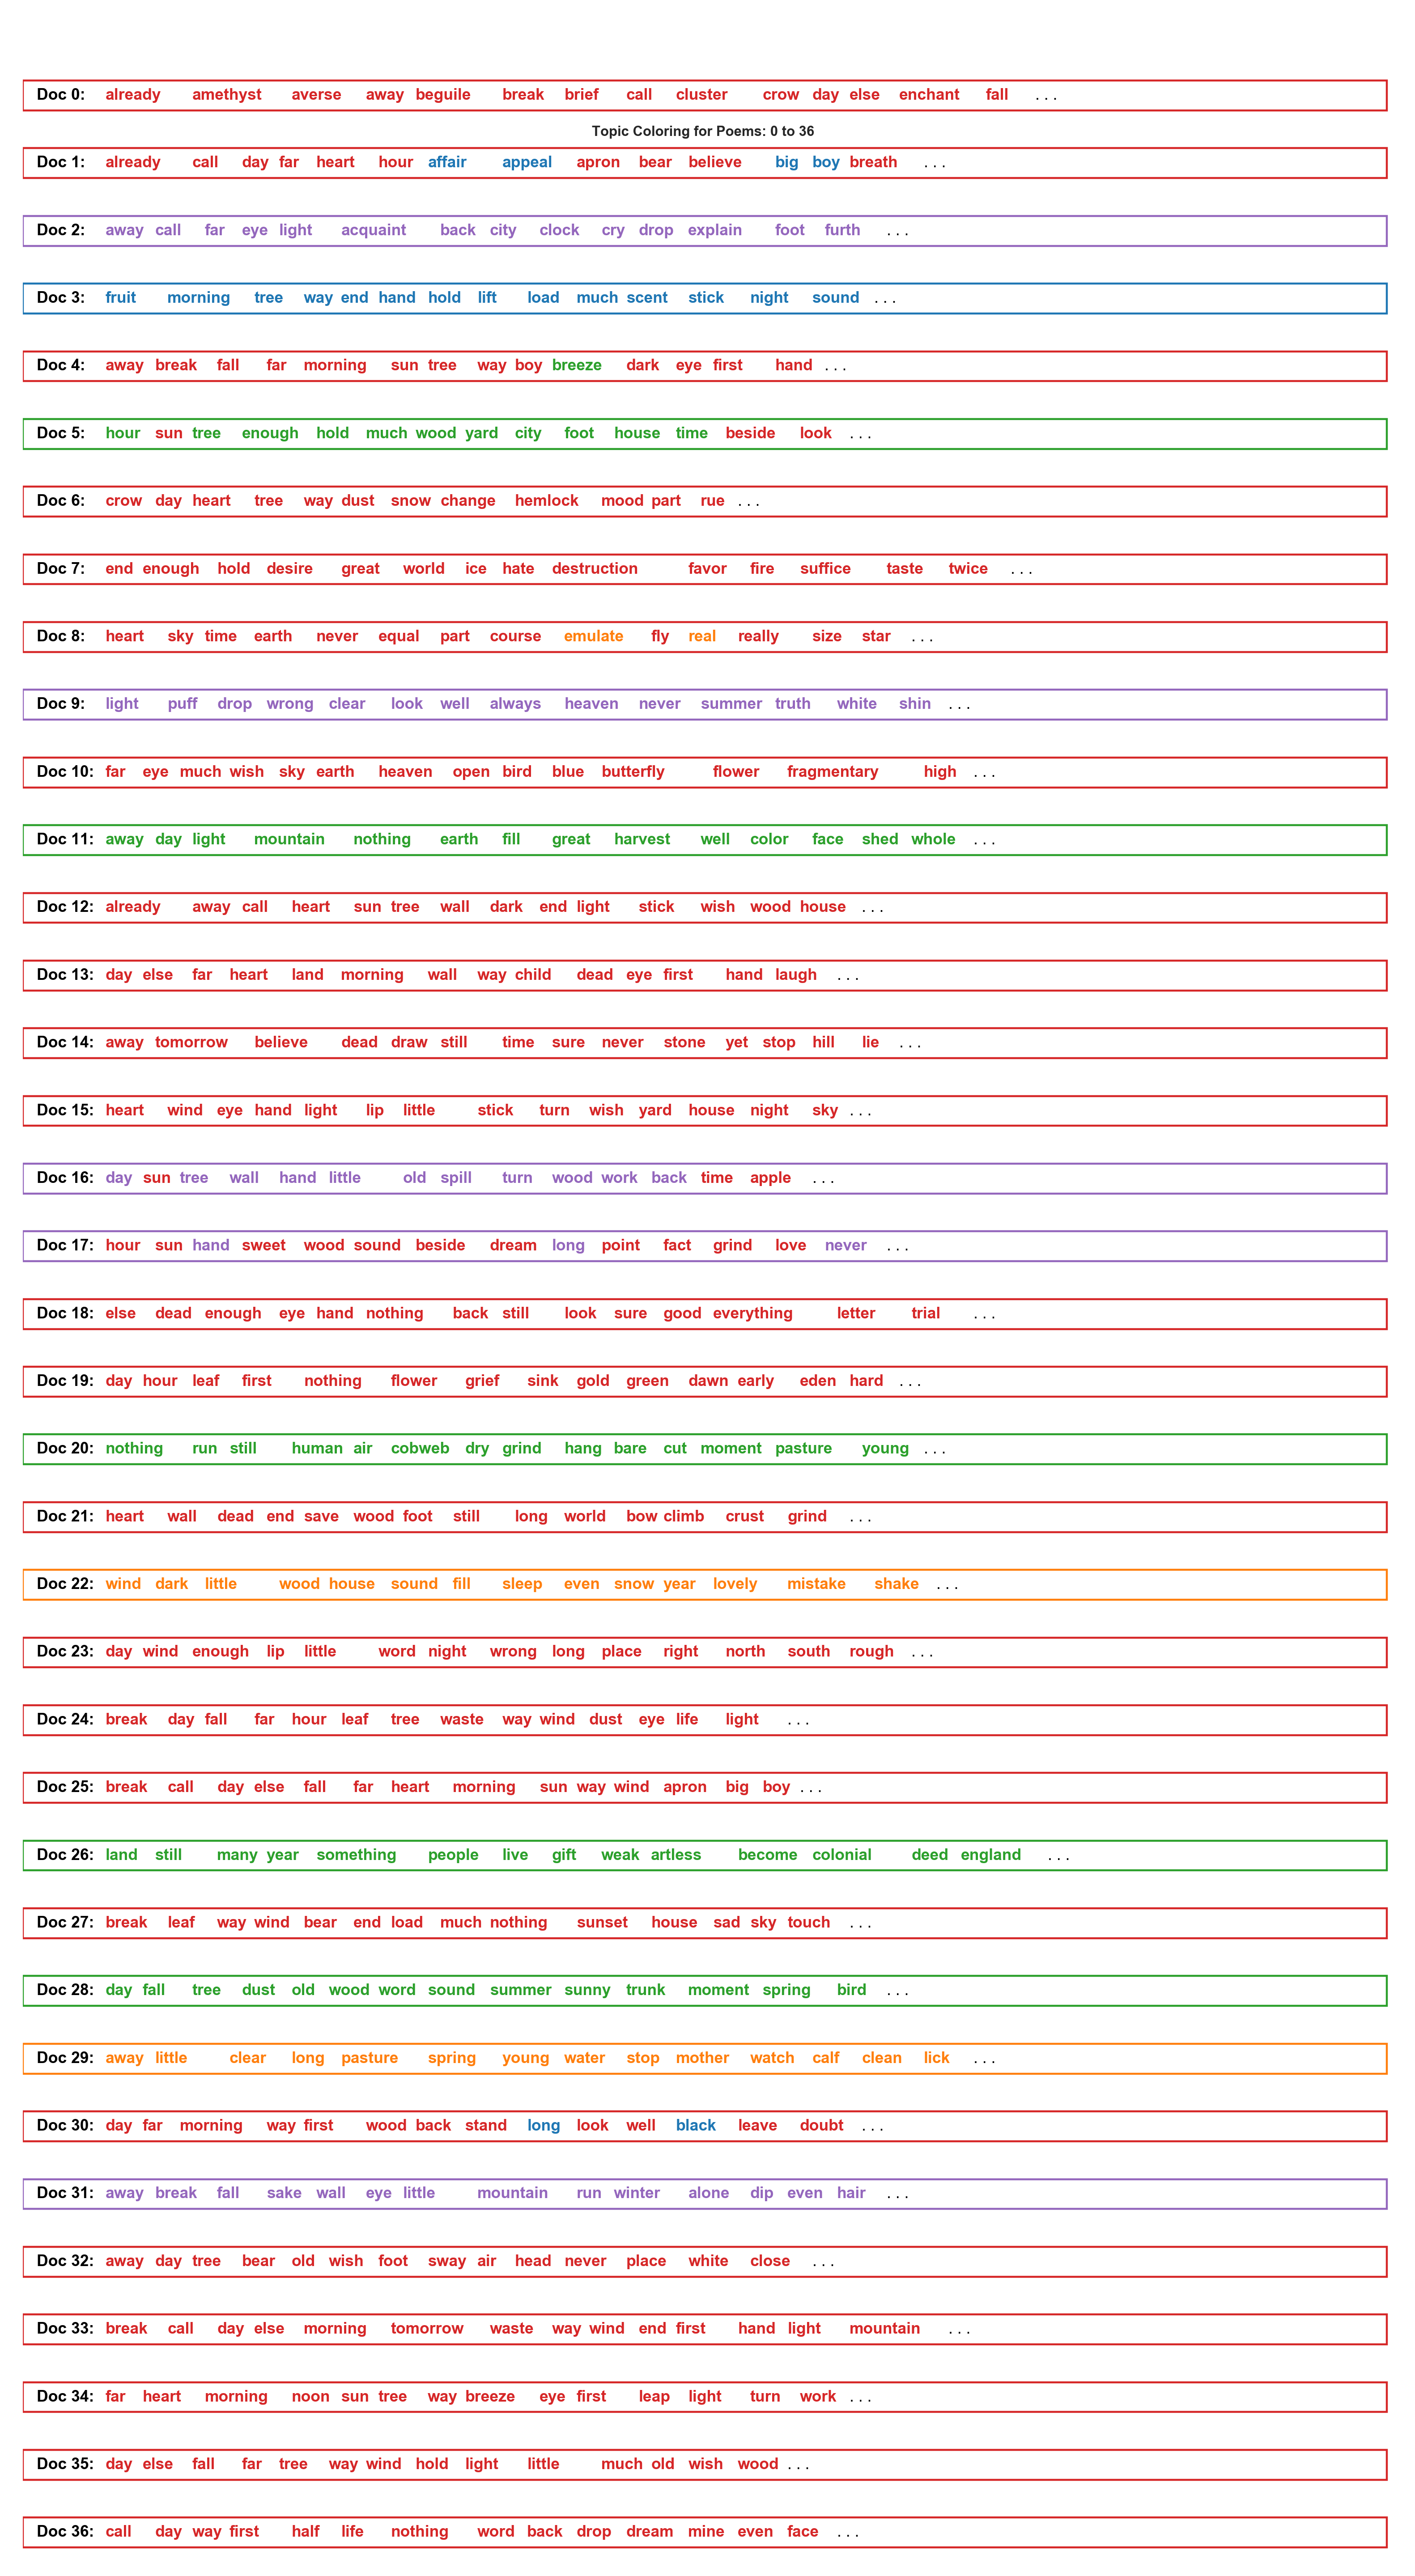

In [75]:
# Word colouring of N poems
from matplotlib.patches import Rectangle

def sentences_chart(lda_model = coh_score2[1], corpus = corpus, start = 0, end = 38):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment = 'center',
                    fontsize = 16, color = 'black', transform = ax.transAxes, fontweight = 700)

            # Draw Rectangle
            topic_percs_sorted = sorted(topic_percs, key = lambda x: (x[1]), reverse = True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill = None, alpha = 1, 
                                   color = mycolors[topic_percs_sorted[0][0]], linewidth = 2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment = 'left',
                            verticalalignment = 'center',
                            fontsize = 16, 
                            color = mycolors[topics],
                            transform = ax.transAxes, 
                            fontweight = 700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment = 'left',
                    verticalalignment = 'center',
                    fontsize = 16, 
                    color = 'black',
                    transform = ax.transAxes)       

    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.suptitle('Topic Coloring for Poems: ' + str(start) + ' to ' + str(end-2), \
                 fontsize = 14, y = 0.95, fontweight = 700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [76]:
# Define a function that identifies and quantifies the dominant topics
def topics_per_document(model, corpus, start = 0, end = 1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse = True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    
    return(dominant_topics, topic_percentages)

In [77]:
dominant_topics, topic_percentages = topics_per_document(model = coh_score2[1], corpus = corpus, end = -1)

In [78]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns = ['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name = 'count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name = 'count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in coh_score2[1].show_topics(formatted = False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns = ['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level =0,inplace = True)

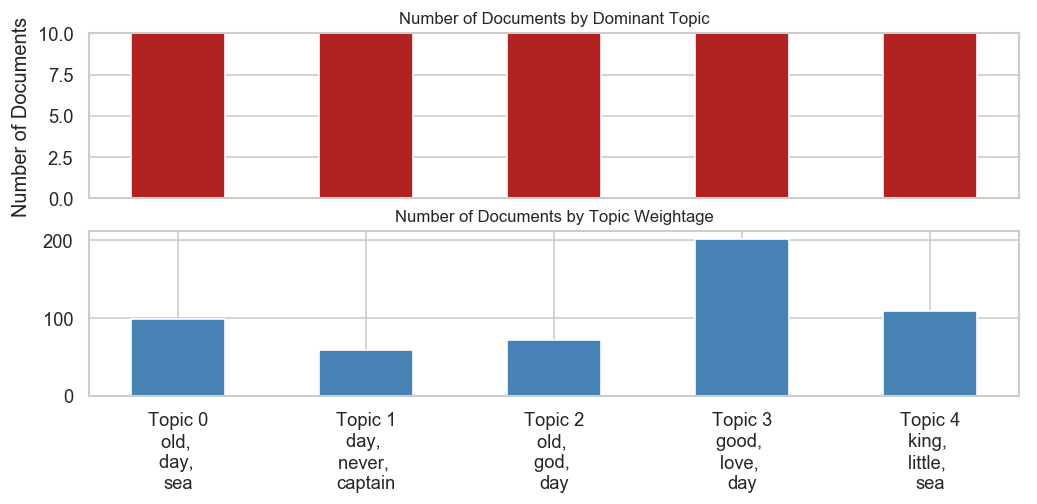

In [79]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 4), dpi = 120, sharex = True)

# Topic Distribution by Dominant Topics
ax1.bar(x = 'Dominant_Topic', 
        height = 'count', 
        data = df_dominant_topic_in_each_doc, 
        width = .5, color = 'firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + \
                               df_top3words.loc[df_top3words.topic_id == x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size = 10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10)

# Topic Distribution by Topic Weights
ax2.bar(x = 'index', 
        height = 'count', 
        data = df_topic_weightage_by_doc, 
        width = .5, color = 'steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict = dict(size = 10))

plt.show()

### Create a keyword network based on term frequency and TF-IDF
(use the "to_gephi.csv" and "to_gephi2.csv" files in Gephi for visualisation)
source: https://pythondata.com/text-analytics-visualization/

In [80]:
# Define a function that extracts the most common words per poem
def get_keywords(token_list, num):
    return Counter(token_list).most_common(num)

In [81]:
# Convert the filtered poems into strings
poemlist3 = [str(poem) for poem in poemlist2]
token_list = [word_tokenize(poem) for poem in poemlist3]

In [82]:
df4 = pd.DataFrame({"title": list(title_dict.values()), 
                    "poet": list(poet_dict.values()),
                    "filteredPoem": poemlist3})
df4.head()

title          poet  \
0                    October  Robert Frost   
1                ‘Out, Out—’  Robert Frost   
2  Acquainted with the Night  Robert Frost   
3        After Apple-Picking  Robert Frost   
4                    Birches  Robert Frost   

                                        filteredPoem  
0  hush october morning mild leave ripen fall tom...  
1  buzz snarl rattle yard make dust drop stave le...  
2  acquaint night walk rain back rain outwalked f...  
3  long point ladder stick tree toward heaven sti...  
4  birch bend leave right across line straight da...

In [83]:
# Use the function to extract the top 5 words per poem
keywords = [get_keywords(tokens, 5) for tokens in token_list]

# Extract the list of keywords 
unzipped = [zip(*kw)for kw in keywords]
kw = [list(x)[0] for x in unzipped]

# Convert the list of keywords to a string
kw2 = [",".join(str(y) for y in x) for x in kw]

# Add the list of keywords to the dataframe
df4["keywords_TF"] = kw2
df4.head()

title          poet  \
0                    October  Robert Frost   
1                ‘Out, Out—’  Robert Frost   
2  Acquainted with the Night  Robert Frost   
3        After Apple-Picking  Robert Frost   
4                    Birches  Robert Frost   

                                        filteredPoem  \
0  hush october morning mild leave ripen fall tom...   
1  buzz snarl rattle yard make dust drop stave le...   
2  acquaint night walk rain back rain outwalked f...   
3  long point ladder stick tree toward heaven sti...   
4  birch bend leave right across line straight da...   

                      keywords_TF  
0  slow,hush,october,morning,mild  
1    hand,snarl,rattle,half,count  
2   acquaint,night,rain,back,city  
3    apple,sleep,ladder,pick,keep  
4      tree,like,birch,break,away

In [84]:
# Add keywords based on TF-IDF
impt_words2 = poems_df5.reset_index().groupby("Title")["Word"].apply(list)
df4["keywords_TF-IDF"] = [",".join(str(y) for y in x) for x in impt_words2]
df4.head()

title          poet  \
0                    October  Robert Frost   
1                ‘Out, Out—’  Robert Frost   
2  Acquainted with the Night  Robert Frost   
3        After Apple-Picking  Robert Frost   
4                    Birches  Robert Frost   

                                        filteredPoem  \
0  hush october morning mild leave ripen fall tom...   
1  buzz snarl rattle yard make dust drop stave le...   
2  acquaint night walk rain back rain outwalked f...   
3  long point ladder stick tree toward heaven sti...   
4  birch bend leave right across line straight da...   

                      keywords_TF                              keywords_TF-IDF  
0  slow,hush,october,morning,mild         contentedly,sake,solemnly,tonga,yore  
1    hand,snarl,rattle,half,count                    fate,hill,jakko,mist,wait  
2   acquaint,night,rain,back,city               chorus,look,patrol,scout,tight  
3    apple,sleep,ladder,pick,keep  arduous,hardihood,rome,strongly,unshakeable  
4      tree,like,birch,break,away                 good,judge,lord,ripen,spring

In [85]:
# Dataframe of keywords according to term frequency
keywordsTF = []
for i, r in df4.iterrows():
    keywords = r["keywords_TF"].split(",")
    for kw in keywords:
        keywordsTF.append((kw.strip(""), r["keywords_TF"]))
kwTF_df = pd.DataFrame(keywordsTF).rename(columns = {0: "keyword", 1: "keywords"})
kwTF_df.head()

keyword                        keywords
0     slow  slow,hush,october,morning,mild
1     hush  slow,hush,october,morning,mild
2  october  slow,hush,october,morning,mild
3  morning  slow,hush,october,morning,mild
4     mild  slow,hush,october,morning,mild

In [86]:
# Dataframe of keywords according to TF-IDF
keywordsTFIDF = []
for i, r in df4.iterrows():
    keywords = r["keywords_TF-IDF"].split(",")
    for kw in keywords:
        keywordsTFIDF.append((kw.strip(""), r["keywords_TF-IDF"]))
kwTFIDF_df = pd.DataFrame(keywordsTFIDF).rename(columns = {0: "keyword", 1: "keywords"})
kwTFIDF_df.head()

keyword                              keywords
0  contentedly  contentedly,sake,solemnly,tonga,yore
1         sake  contentedly,sake,solemnly,tonga,yore
2     solemnly  contentedly,sake,solemnly,tonga,yore
3        tonga  contentedly,sake,solemnly,tonga,yore
4         yore  contentedly,sake,solemnly,tonga,yore

#### TF

In [87]:
# Convert rows to lists
docsTF = kwTF_df["keywords"].tolist()
namesTF = kwTF_df["keyword"].tolist()

docs_list = [i.split(",")for i in docsTF]

In [88]:
# Create an ordered dictionary of keyword and frequency of co-occurrence
from collections import OrderedDict
occurrences = OrderedDict((name, OrderedDict((name, 0) for name in namesTF)) for name in namesTF)

for i in docs_list:
    for x in range(len(i)):
        for item in i[:x] + i[x + 1:]:
            occurrences[i[x]][item] += 1

# Create a dataframe of co-occurrences
co_occur_df = pd.DataFrame.from_dict(occurrences)         
co_occur_df.head()

slow  hush  october  morning  mild  hand  snarl  rattle  half  \
abash         0     0        0        0     0     0      0       0     0   
absent        0     0        0        0     0     0      0       0     0   
absurdity     0     0        0        0     0     0      0       0     0   
acquaint      0     0        0        0     0     0      0       0     0   
across        0     0        0        0     0     0      0       0     0   

           count  ...   glory  gardener  philadelphia  omer  wink  smite  \
abash          0  ...       0         0             0     0     0      0   
absent         0  ...       0         0             0     0     0      0   
absurdity      0  ...       0         0             0     0     0      0   
acquaint       0  ...       0         0             0     0     0      0   
across         0  ...       0         0             0     0     0      0   

           quebec  small  bury  neck  
abash           0      0     0     0  
absent          0      0     0     0  
absurdity       0      0     0     0  
acquaint        0      0     0     0  
across          0      0     0     0  

[5 rows x 1171 columns]

In [89]:
co_occur_df.to_csv("to_gephi.csv", sep = ",")

#### TF-IDF

In [90]:
# Convert rows to lists
docsTFIDF = kwTFIDF_df["keywords"].tolist()
namesTFIDF = kwTFIDF_df["keyword"].tolist()

docs_list = [i.split(",")for i in docsTFIDF]

In [91]:
# Create an ordered dictionary of keyword and frequency of co-occurrence
from collections import OrderedDict
occurrences2 = OrderedDict((name, OrderedDict((name, 0) for name in namesTFIDF)) for name in namesTFIDF)

for i in docs_list:
    for x in range(len(i)):
        for item in i[:x] + i[x + 1:]:
            occurrences2[i[x]][item] += 1

# Create a dataframe of co-occurrences
co_occur_df2 = pd.DataFrame.from_dict(occurrences2)         
co_occur_df2.head()

contentedly  sake  solemnly  tonga  yore  fate  hill  jakko  \
abasement              0     0         0      0     0     0     0      0   
abash                  0     0         0      0     0     0     0      0   
abby                   0     0         0      0     0     0     0      0   
abdhur                 0     0         0      0     0     0     0      0   
abomination            0     0         0      0     0     0     0      0   

             mist  wait   ...    scindia  baal  doorkeeper  halberd  present  \
abasement       0     0   ...          0     0           0        0        0   
abash           0     0   ...          0     0           0        0        0   
abby            0     0   ...          0     0           0        0        0   
abdhur          0     0   ...          0     0           0        0        0   
abomination     0     0   ...          0     0           0        0        0   

             zion  doctor  hand  rattle  supper  
abasement       0       0     0       0       0  
abash           0       0     0       0       0  
abby            0       0     0       0       0  
abdhur          0       0     0       0       0  
abomination     0       0     0       0       0  

[5 rows x 2115 columns]

In [92]:
co_occur_df2.to_csv("to_gephi2.csv", sep = ",")